In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
# need state 1

df_sales = pd.read_csv('Total Sales - UTSC Lecture.csv')
df_sales.head()
# df_sales["Fiscal Month"] = df_sales['Fiscal Week'].map(week_to_month)
dict1 = {"Need State 1": "Total Sales"}
df_needstate1=df_sales[["Fiscal Year", "Fiscal Week", "Need State 1"]]
# out[out["Fiscal Year"] == 2021]
df_needstate1=df_needstate1.rename(columns=dict1)
df_needstate1["Need State"] = "Need State 1"

df_needstate2=df_sales[["Fiscal Year", "Fiscal Week", "Need State 2"]]
dict2 = {"Need State 2": "Total Sales"}
df_needstate2=df_needstate2.rename(columns=dict2)
df_needstate2["Need State"] = "Need State 2"

df_needstate3=df_sales[["Fiscal Year", "Fiscal Week", "Need State 3"]]
dict3 = {"Need State 3": "Total Sales"}
df_needstate3=df_needstate3.rename(columns=dict3)
df_needstate3["Need State"] = "Need State 3"

df_needstate4=df_sales[["Fiscal Year", "Fiscal Week", "Need State 4"]]
dict4 = {"Need State 4": "Total Sales"}
df_needstate4=df_needstate4.rename(columns=dict4)
df_needstate4["Need State"] = "Need State 4"

df_needstate5=df_sales[["Fiscal Year", "Fiscal Week", "Need State 5"]]
dict5 = {"Need State 5": "Total Sales"}
df_needstate5=df_needstate5.rename(columns=dict5)
df_needstate5["Need State"] = "Need State 5"

df_final = pd.concat([df_needstate1, df_needstate2, df_needstate3, df_needstate4, df_needstate5])

df_final["Fiscal Year"].dtype

#print(df_final)

dtype('int64')

In [37]:
data = pd.read_csv('Factory POS.csv')
data.columns = ['Need State', 'Fiscal Week', '2021', '2022', '2023']
data = data.iloc[1:]
data = data[data['Need State'] != 'Need State 6'].reset_index(drop=True)
melted_data = pd.melt(data, id_vars=[col for col in data.columns if col not in ['2021', '2022', '2023']], 
                      var_name='Fiscal Year', value_name='Factory POS')
melted_data['Fiscal Year'] = melted_data['Fiscal Year'].astype('int64')
melted_data['Fiscal Week'] = melted_data['Fiscal Week'].astype('int64')

#print(melted_data)



In [38]:
customer_dc_inventory = pd.read_csv('Customer DC Inventory.csv')

# Melting the DataFrame
customer_dc_inventory = pd.melt(customer_dc_inventory, id_vars=['Fiscal Year  /  Fiscal Week', 'Unnamed: 1'], var_name='YearWeek', value_name='Amount')

# Correctly extracting Year and Week
customer_dc_inventory['Fiscal Year'] = customer_dc_inventory['YearWeek'].apply(lambda x: x.split('.')[0])
customer_dc_inventory['Fiscal Week'] = customer_dc_inventory['YearWeek'].apply(lambda x: x.split('.')[1] if '.' in x else 0)

# Separating DC Amount and Store Amount on Hand data
dc_amount = customer_dc_inventory[customer_dc_inventory['Unnamed: 1'] == 'Dc Amount'].copy()
store_amount = customer_dc_inventory[customer_dc_inventory['Unnamed: 1'] == 'Store Amt On Hand'].copy()

# Renaming and dropping unnecessary columns
dc_amount.rename(columns={'Amount': 'DC Amount', 'Fiscal Year  /  Fiscal Week': 'Need State'}, inplace=True)
dc_amount.drop(['Unnamed: 1', 'YearWeek'], axis=1, inplace=True)

store_amount.rename(columns={'Amount': 'Store Amount on Hand', 'Fiscal Year  /  Fiscal Week': 'Need State'}, inplace=True)
store_amount.drop(['Unnamed: 1', 'YearWeek'], axis=1, inplace=True)

# Merging DC and Store Amount data
final_data = pd.merge(dc_amount, store_amount, on=['Need State', 'Fiscal Year', 'Fiscal Week'])
#final_data["Week"].astype(int)
final_data['Fiscal Week'].astype(str).astype(int)

final_data["Fiscal Week"] = final_data['Fiscal Week'].astype(str).astype(int) + 1
final_data['Fiscal Year'] = final_data['Fiscal Year'].astype('int64')
final_data['Fiscal Week'] = final_data['Fiscal Week'].astype('int64')

#print(final_data)


In [39]:
dfEcom = pd.read_csv("Total Ecomm POS (Factory $).csv", header=1, index_col=1)
dfEcom.head()
dfEcom_reset = dfEcom.reset_index()

# Step 2: Melt the DataFrame
# 'Fiscal Week' is the var_name for the week columns
# 'Sales' is the value_name for the values under week columns
dfEcom_clean = pd.melt(dfEcom_reset, 
                     id_vars=['Fiscal Year', 'Need State'], 
                     var_name='Fiscal Week', 
                     value_name='E-Commerce Sales')

# Convert 'Fiscal Week' to numeric type for proper sorting, if necessary
dfEcom_clean['Fiscal Week'] = pd.to_numeric(dfEcom_clean['Fiscal Week'])

# Sort the DataFrame based on 'Fiscal Year', 'Need State', and 'Fiscal Week' for readability
dfEcom_clean.sort_values(by=['Fiscal Year', 'Need State', 'Fiscal Week'], inplace=True)

dfEcom_clean.reset_index(drop=True, inplace=True)

# Removing Need State 6 per judge's request
dfEcom_clean = dfEcom_clean[dfEcom_clean['Need State'] != 'Need State 6']
#dfEcom_clean.head()

In [40]:
factory_pos_and_total_sales = pd.merge(melted_data, df_final, on=["Fiscal Year",'Fiscal Week', 'Need State'], how='inner')
factory_pos_totsales_dc_inventory = pd.merge(factory_pos_and_total_sales, final_data, on=['Need State', 'Fiscal Year', 'Fiscal Week'], how='inner')
factory_pos_totsales_dc_inventory
all_dataframes_merged = pd.merge(factory_pos_totsales_dc_inventory, dfEcom_clean, on=["Fiscal Year",'Fiscal Week', 'Need State'], how='inner')
#all_dataframes_merged.head(10)

In [41]:
filtered_df = all_dataframes_merged.drop(all_dataframes_merged[(all_dataframes_merged['Fiscal Week'] >= 42) & (all_dataframes_merged['Fiscal Year'] == 2023)].index)

In [31]:
#filtered_df['Total Sales'].describe()

In [32]:
#filtered_df['Factory POS'].describe()

In [33]:
#filtered_df['DC Amount'].describe()

In [34]:
#filtered_df['Store Amount on Hand'].describe()

### Need State 1 Exploration

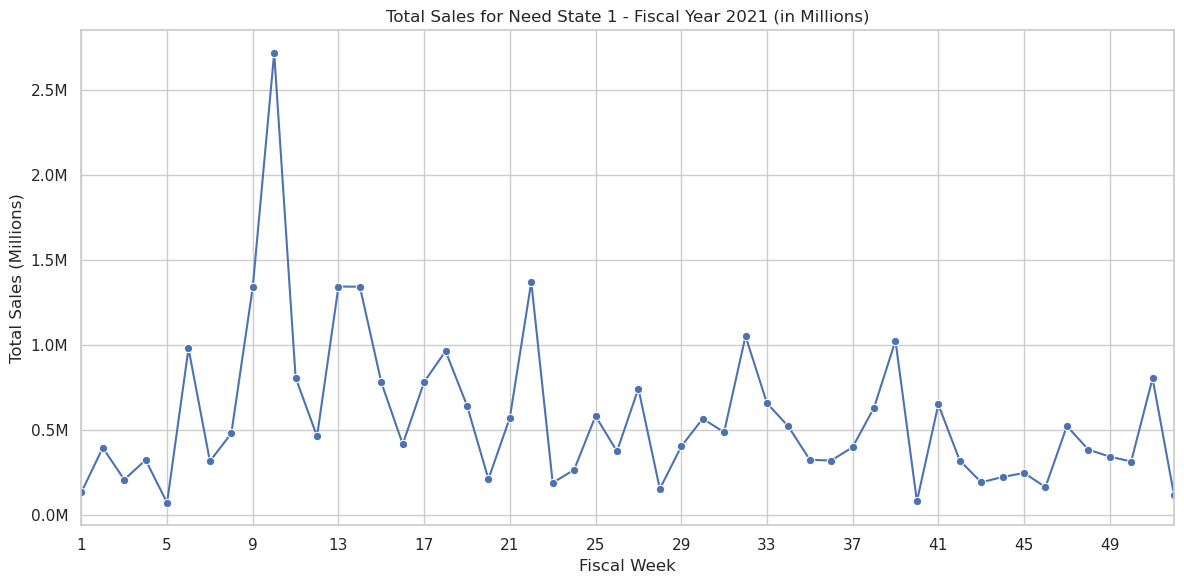

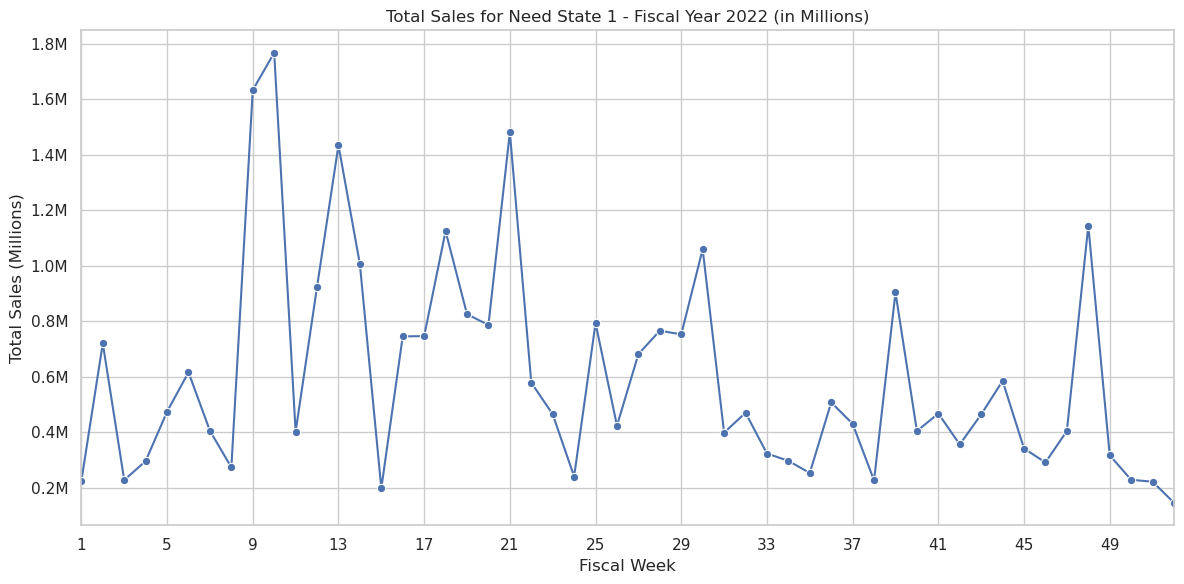

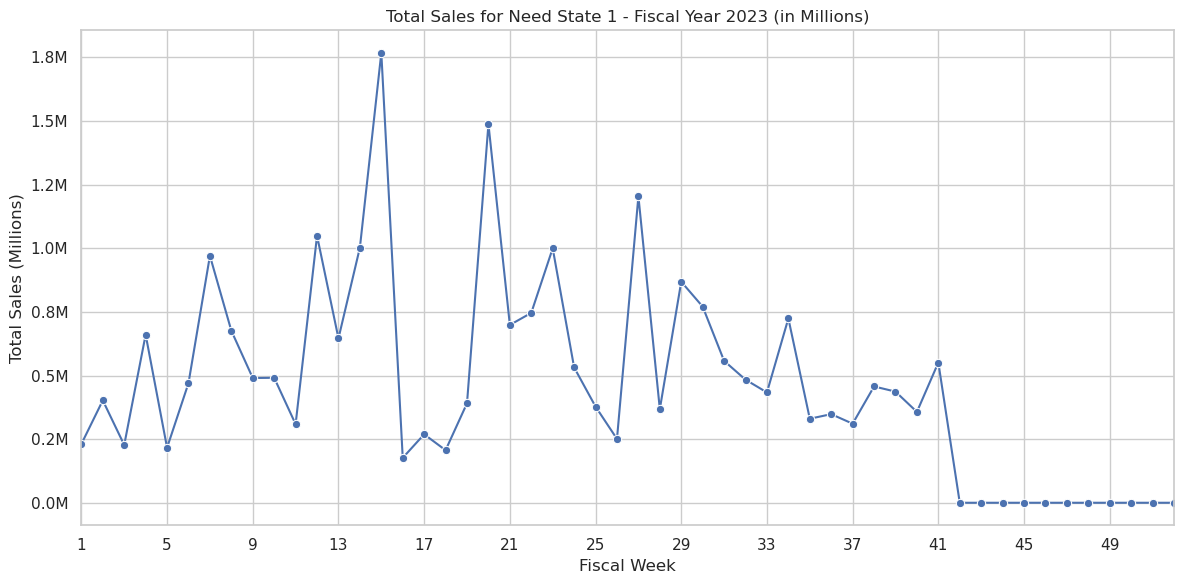

In [53]:
# Filter for 'Need State 1'
need_state_1_df = filtered_df[filtered_df['Need State'] == 'Need State 1']
# Group data by 'Fiscal Year' and 'Fiscal Week', then aggregate total sales
grouped_sales = need_state_1_df.groupby(['Fiscal Year', 'Fiscal Week'])['Total Sales'].sum().reset_index()
# Function to format the y-axis labels as millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Set plot style
sns.set(style="whitegrid")

# Get unique fiscal years from the data
fiscal_years = grouped_sales['Fiscal Year'].unique()

for year in fiscal_years:
    # Ensure the x-axis covers all weeks from 1 to 52
    all_weeks = pd.DataFrame({'Fiscal Week': range(1, 53)})
    # Merge to ensure all weeks are represented, even if there's no data for some
    year_data = pd.merge(all_weeks, grouped_sales[grouped_sales['Fiscal Year'] == year], on='Fiscal Week', how='left').fillna(0)
    
    # Create a line plot for the fiscal year
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(x='Fiscal Week', y='Total Sales', data=year_data, marker='o', sort=False)
    ax.yaxis.set_major_formatter(formatter)  # Apply the formatter to the y-axis
    plt.title(f'Total Sales for Need State 1 - Fiscal Year {year} (in Millions)')
    plt.xlabel('Fiscal Week')
    plt.ylabel('Total Sales (Millions)')
    
    # Set x-ticks to display every 4 weeks
    plt.xticks(np.arange(1, 53, 4))
    plt.xlim(1, 52)  # Ensure x-axis goes from week 1 to 52
    
    plt.tight_layout()
    plt.show()

In [54]:
#filtered_df['E-Commerce Sales'].describe()

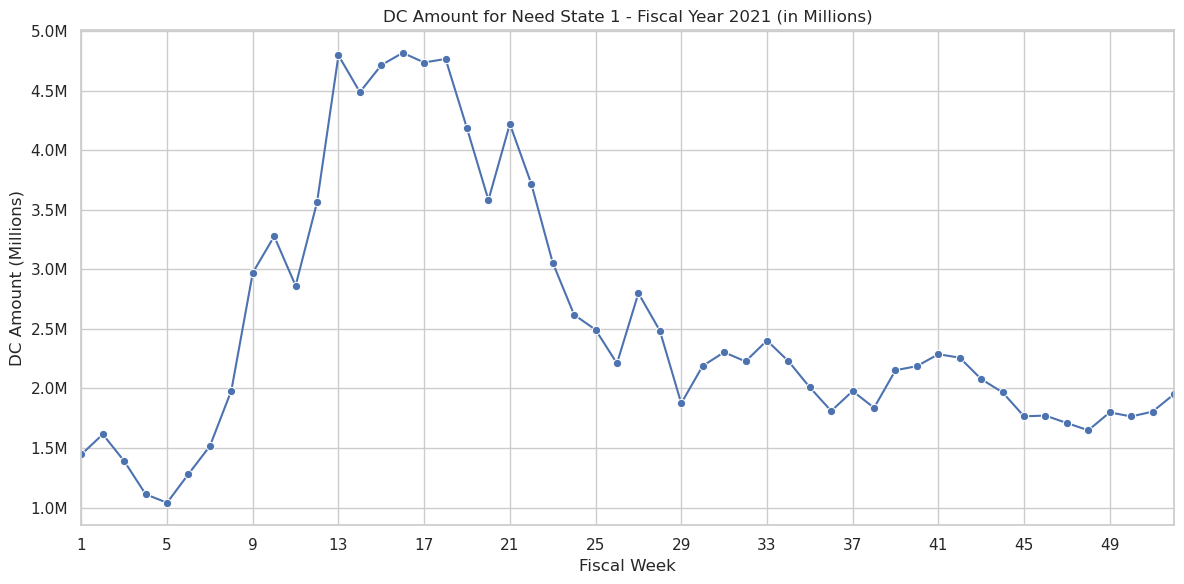

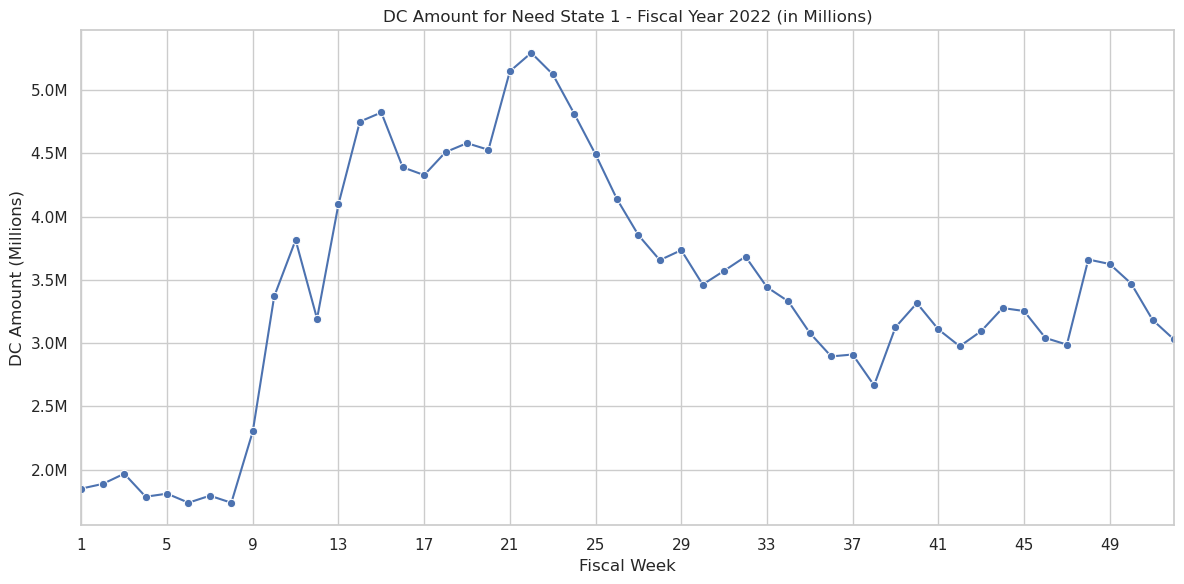

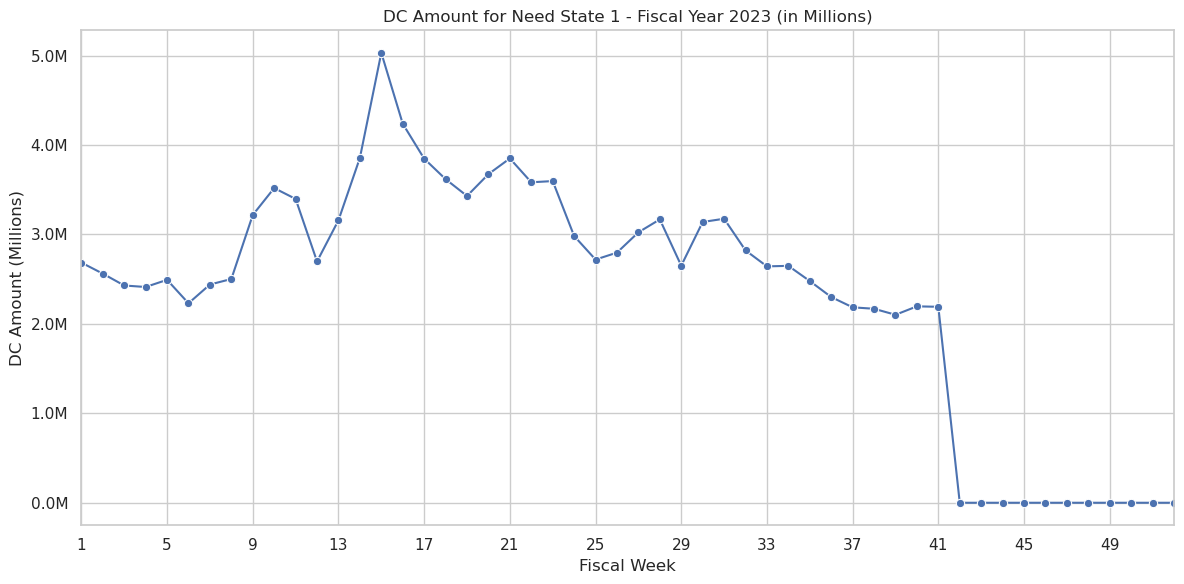

In [55]:
# Filter for 'Need State 1'
need_state_1_df = filtered_df[filtered_df['Need State'] == 'Need State 1']
# Group data by 'Fiscal Year' and 'Fiscal Week', then aggregate total sales
grouped_sales = need_state_1_df.groupby(['Fiscal Year', 'Fiscal Week'])['DC Amount'].sum().reset_index()

# Function to format the y-axis labels as millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Set plot style
sns.set(style="whitegrid")

# Get unique fiscal years from the data
fiscal_years = grouped_sales['Fiscal Year'].unique()

for year in fiscal_years:
    # Ensure the x-axis covers all weeks from 1 to 52
    all_weeks = pd.DataFrame({'Fiscal Week': range(1, 53)})
    # Merge to ensure all weeks are represented, even if there's no data for some
    year_data = pd.merge(all_weeks, grouped_sales[grouped_sales['Fiscal Year'] == year], on='Fiscal Week', how='left').fillna(0)
    
    # Create a line plot for the fiscal year
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(x='Fiscal Week', y='DC Amount', data=year_data, marker='o', sort=False)
    ax.yaxis.set_major_formatter(formatter)  # Apply the formatter to the y-axis
    plt.title(f'DC Amount for Need State 1 - Fiscal Year {year} (in Millions)')
    plt.xlabel('Fiscal Week')
    plt.ylabel('DC Amount (Millions)')
    
    # Set x-ticks to display every 4 weeks
    plt.xticks(np.arange(1, 53, 4))
    plt.xlim(1, 52)  # Ensure x-axis goes from week 1 to 52
    
    plt.tight_layout()
    plt.show()

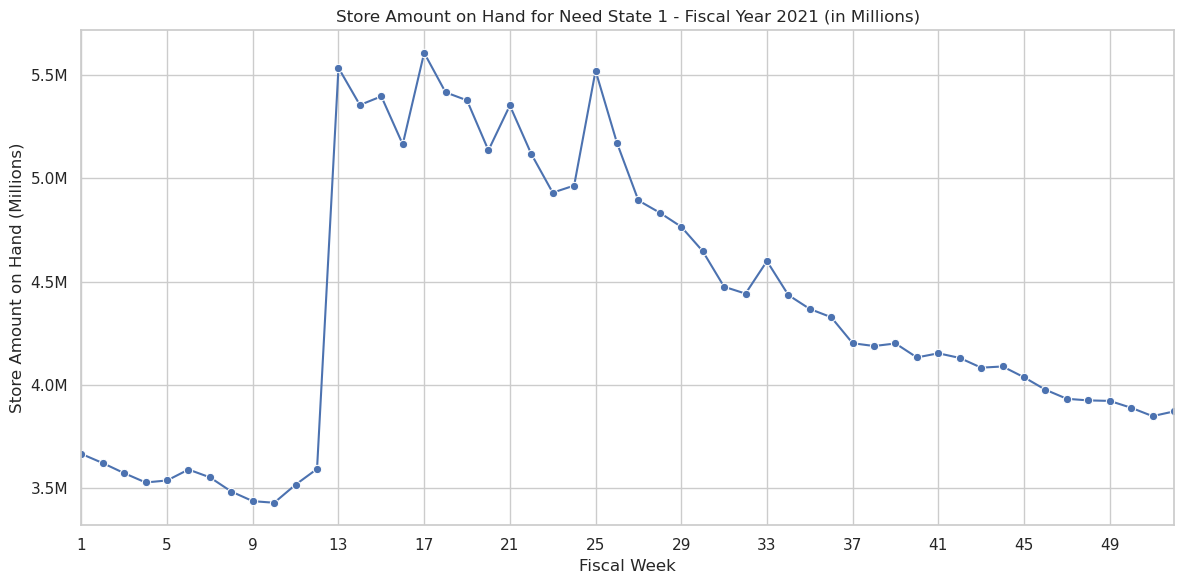

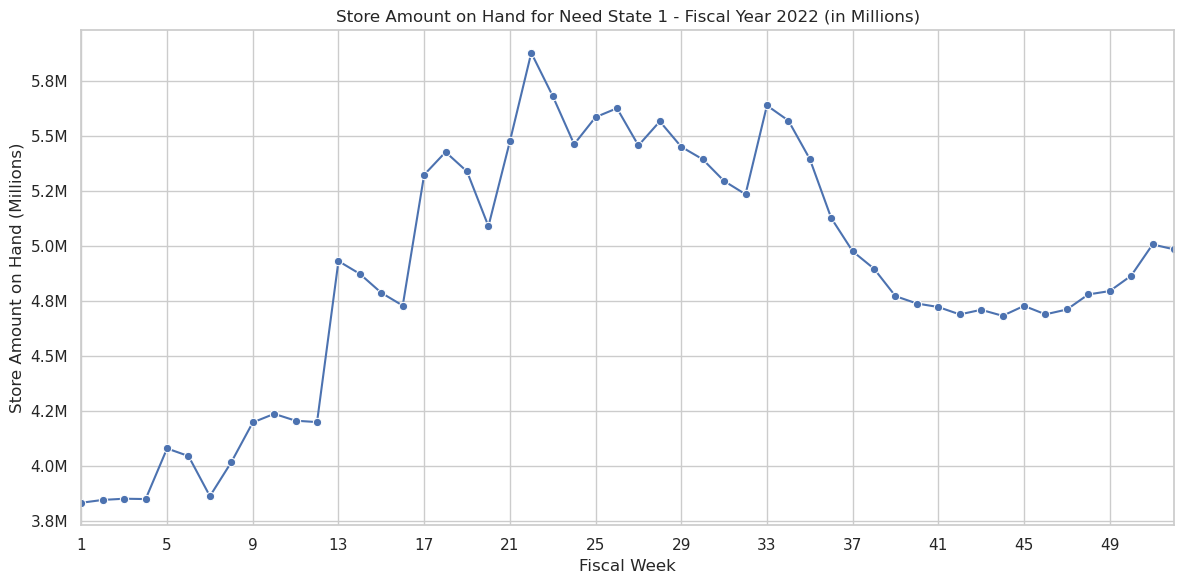

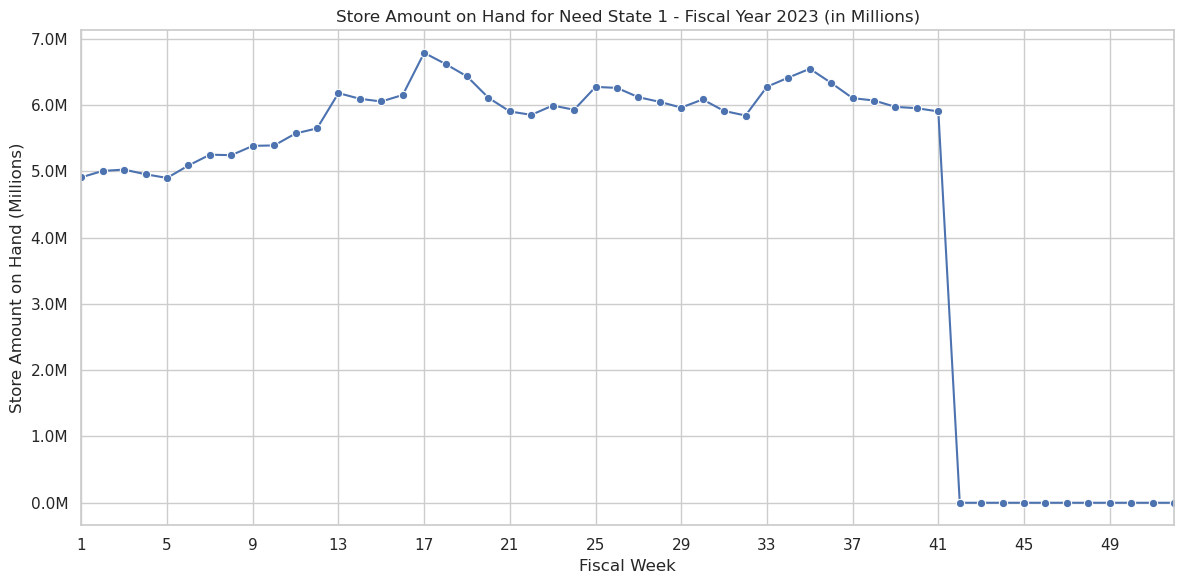

In [58]:
# Filter for 'Need State 1'
need_state_1_df = filtered_df[filtered_df['Need State'] == 'Need State 1']
# Group data by 'Fiscal Year' and 'Fiscal Week', then aggregate total sales
grouped_sales = need_state_1_df.groupby(['Fiscal Year', 'Fiscal Week'])['Store Amount on Hand'].sum().reset_index()

# Function to format the y-axis labels as millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Set plot style
sns.set(style="whitegrid")

# Get unique fiscal years from the data
fiscal_years = grouped_sales['Fiscal Year'].unique()

for year in fiscal_years:
    # Ensure the x-axis covers all weeks from 1 to 52
    all_weeks = pd.DataFrame({'Fiscal Week': range(1, 53)})
    # Merge to ensure all weeks are represented, even if there's no data for some
    year_data = pd.merge(all_weeks, grouped_sales[grouped_sales['Fiscal Year'] == year], on='Fiscal Week', how='left').fillna(0)
    
    # Create a line plot for the fiscal year
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(x='Fiscal Week', y='Store Amount on Hand', data=year_data, marker='o', sort=False)
    ax.yaxis.set_major_formatter(formatter)  # Apply the formatter to the y-axis
    plt.title(f'Store Amount on Hand for Need State 1 - Fiscal Year {year} (in Millions)')
    plt.xlabel('Fiscal Week')
    plt.ylabel('Store Amount on Hand (Millions)')
    
    # Set x-ticks to display every 4 weeks
    plt.xticks(np.arange(1, 53, 4))
    plt.xlim(1, 52)  # Ensure x-axis goes from week 1 to 52
    
    plt.tight_layout()
    plt.show()

### Need State 2 Exploration

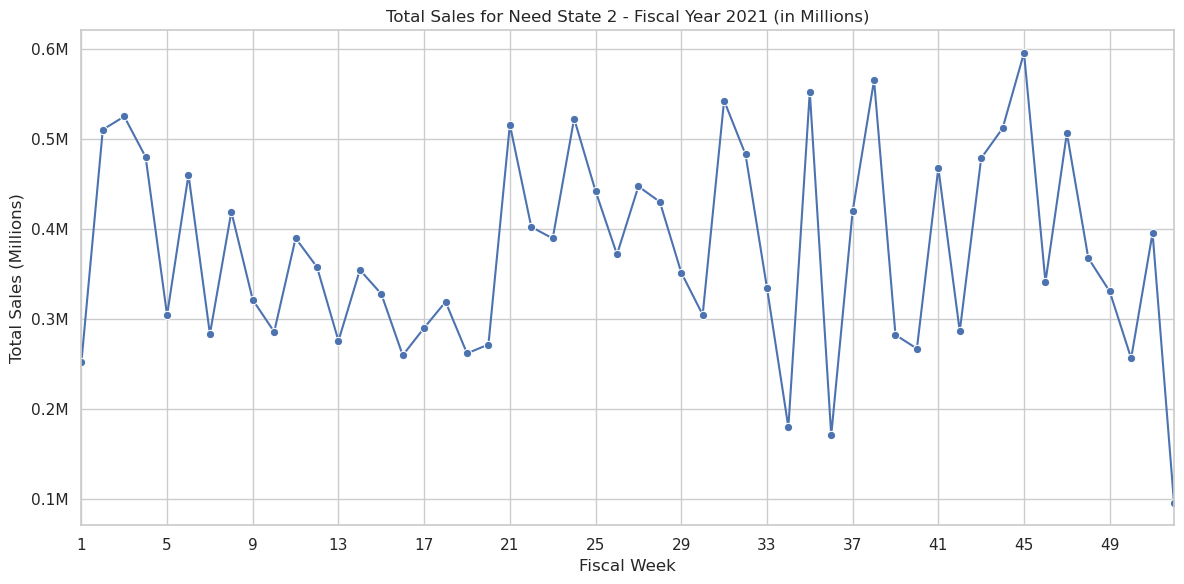

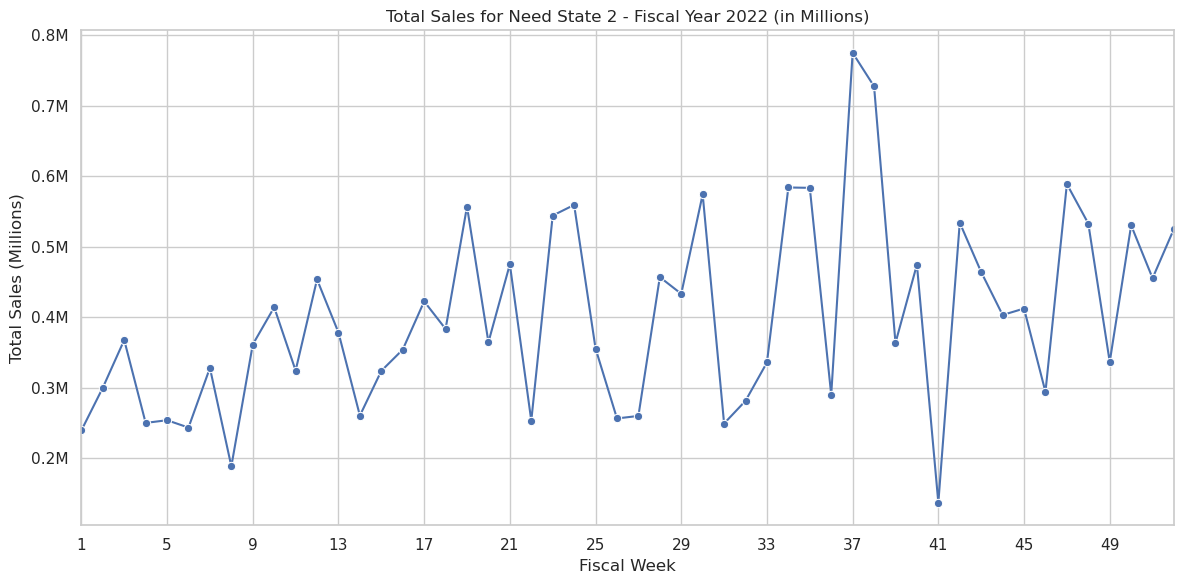

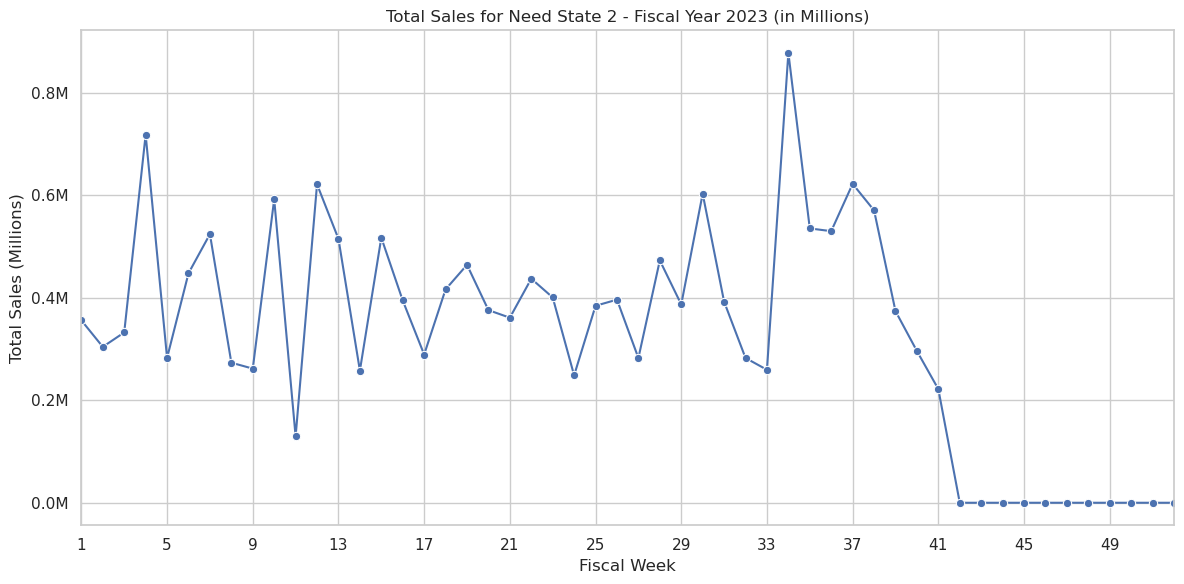

In [45]:
# Filter for 'Need State 2'
need_state_2_df = filtered_df[filtered_df['Need State'] == 'Need State 2']

# Group data by 'Fiscal Year' and 'Fiscal Week', then aggregate total sales
grouped_sales_2 = need_state_2_df.groupby(['Fiscal Year', 'Fiscal Week'])['Total Sales'].sum().reset_index()

# Function to format the y-axis labels as millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Set plot style
sns.set(style="whitegrid")

# Get unique fiscal years from the data
fiscal_years = grouped_sales_2['Fiscal Year'].unique()

for year in fiscal_years:
    # Ensure the x-axis covers all weeks from 1 to 52
    all_weeks = pd.DataFrame({'Fiscal Week': range(1, 53)})
    # Merge to ensure all weeks are represented, even if there's no data for some
    year_data = pd.merge(all_weeks, grouped_sales_2[grouped_sales_2['Fiscal Year'] == year], on='Fiscal Week', how='left').fillna(0)
    
    # Create a line plot for the fiscal year
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(x='Fiscal Week', y='Total Sales', data=year_data, marker='o', sort=False)
    ax.yaxis.set_major_formatter(formatter)  # Apply the formatter to the y-axis
    plt.title(f'Total Sales for Need State 2 - Fiscal Year {year} (in Millions)')
    plt.xlabel('Fiscal Week')
    plt.ylabel('Total Sales (Millions)')
    
    # Set x-ticks to display every 4 weeks
    plt.xticks(np.arange(1, 53, 4))
    plt.xlim(1, 52)  # Ensure x-axis goes from week 1 to 52
    
    plt.tight_layout()
    plt.show()

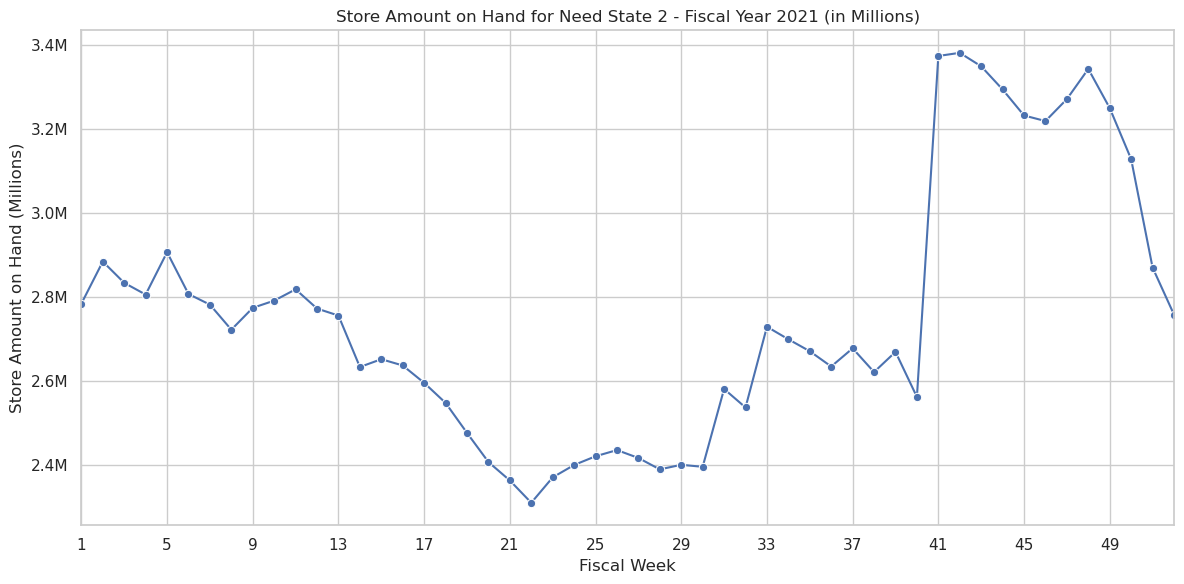

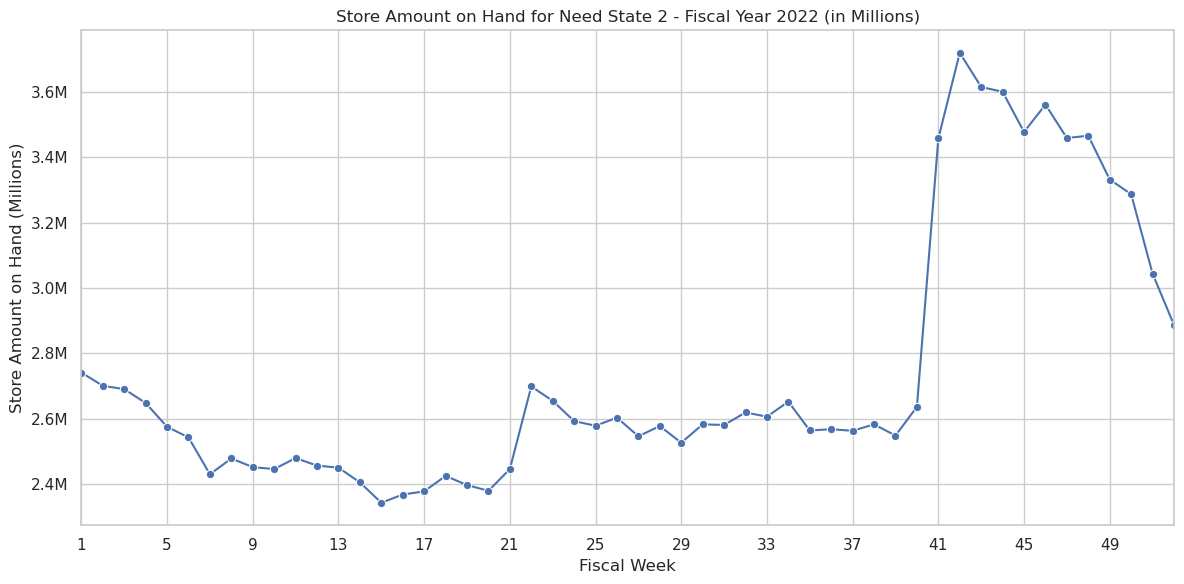

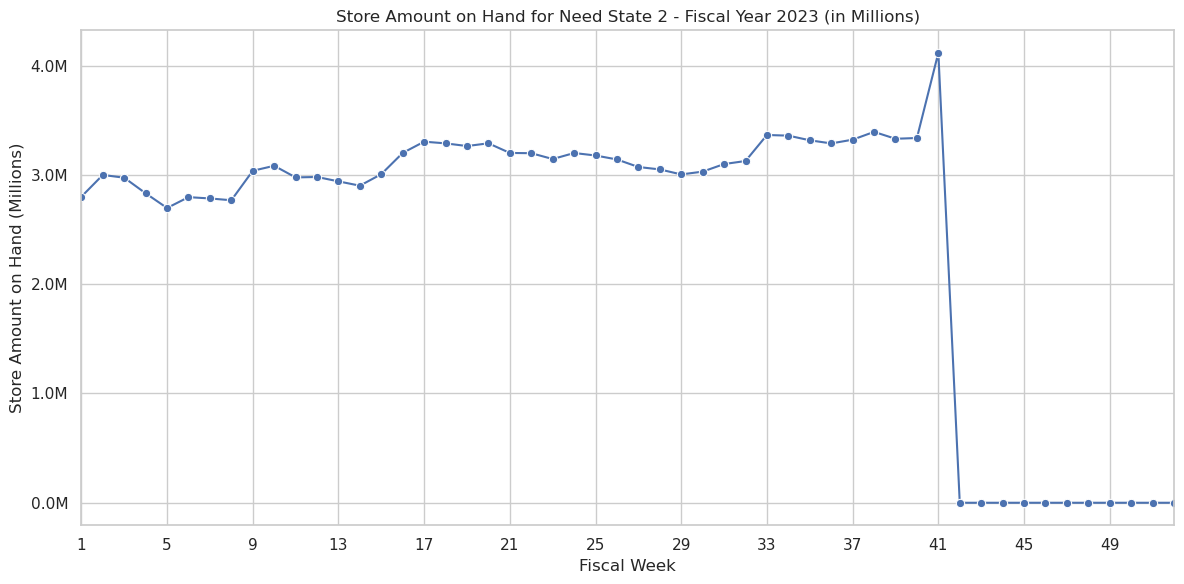

In [59]:
# Filter for 'Need State 2'
need_state_2_df = filtered_df[filtered_df['Need State'] == 'Need State 2']
# Group data by 'Fiscal Year' and 'Fiscal Week', then aggregate total sales
grouped_sales = need_state_2_df.groupby(['Fiscal Year', 'Fiscal Week'])['Store Amount on Hand'].sum().reset_index()

# Function to format the y-axis labels as millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Set plot style
sns.set(style="whitegrid")

# Get unique fiscal years from the data
fiscal_years = grouped_sales['Fiscal Year'].unique()

for year in fiscal_years:
    # Ensure the x-axis covers all weeks from 1 to 52
    all_weeks = pd.DataFrame({'Fiscal Week': range(1, 53)})
    # Merge to ensure all weeks are represented, even if there's no data for some
    year_data = pd.merge(all_weeks, grouped_sales[grouped_sales['Fiscal Year'] == year], on='Fiscal Week', how='left').fillna(0)
    
    # Create a line plot for the fiscal year
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(x='Fiscal Week', y='Store Amount on Hand', data=year_data, marker='o', sort=False)
    ax.yaxis.set_major_formatter(formatter)  # Apply the formatter to the y-axis
    plt.title(f'Store Amount on Hand for Need State 2 - Fiscal Year {year} (in Millions)')
    plt.xlabel('Fiscal Week')
    plt.ylabel('Store Amount on Hand (Millions)')
    
    # Set x-ticks to display every 4 weeks
    plt.xticks(np.arange(1, 53, 4))
    plt.xlim(1, 52)  # Ensure x-axis goes from week 1 to 52
    
    plt.tight_layout()
    plt.show()

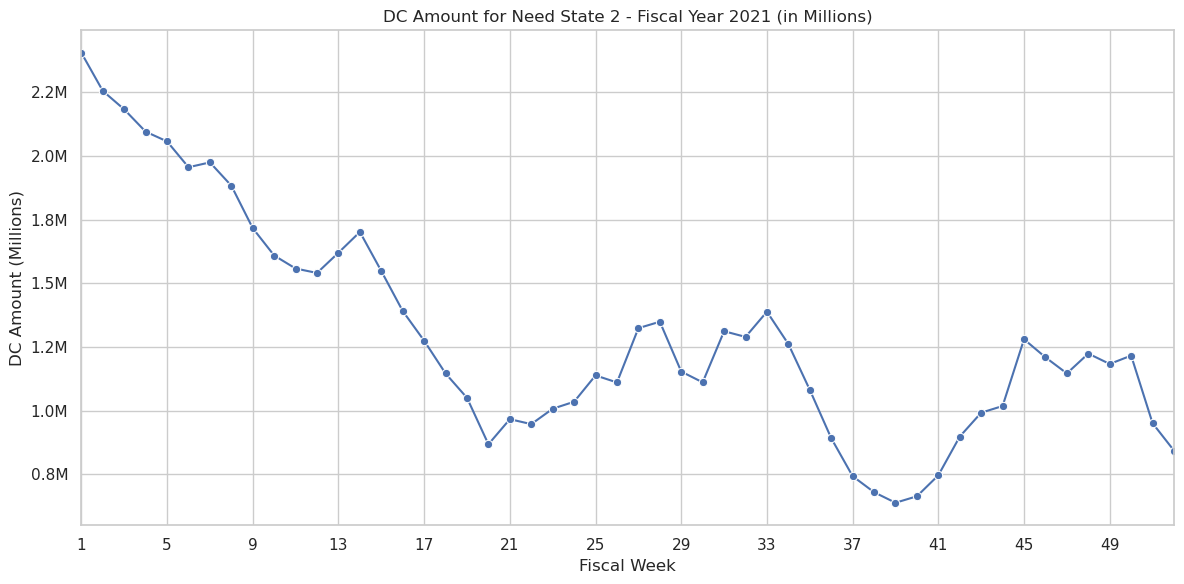

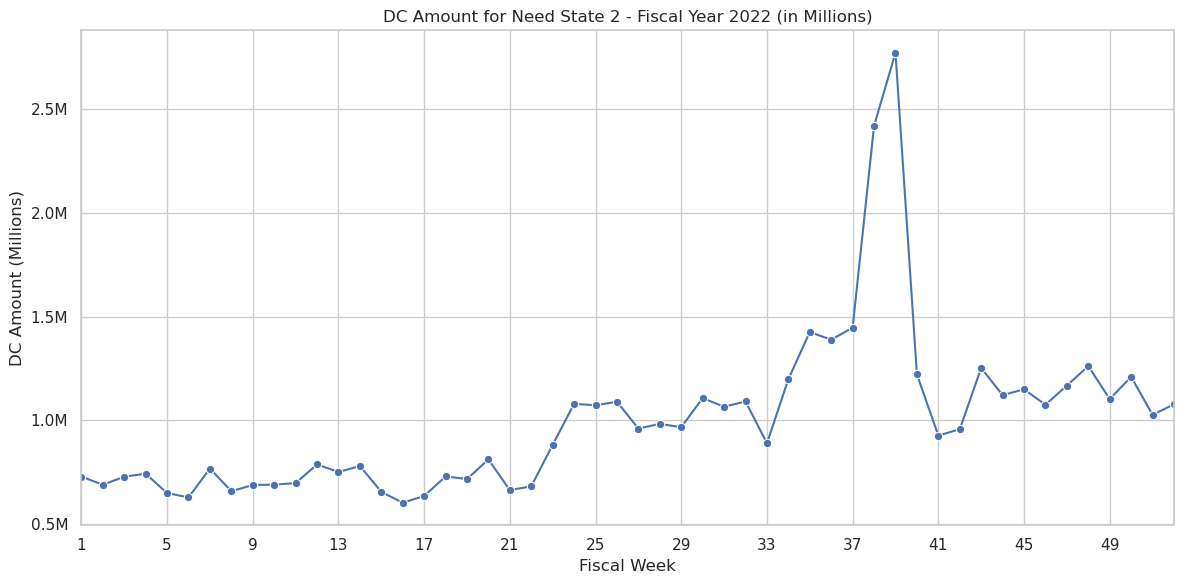

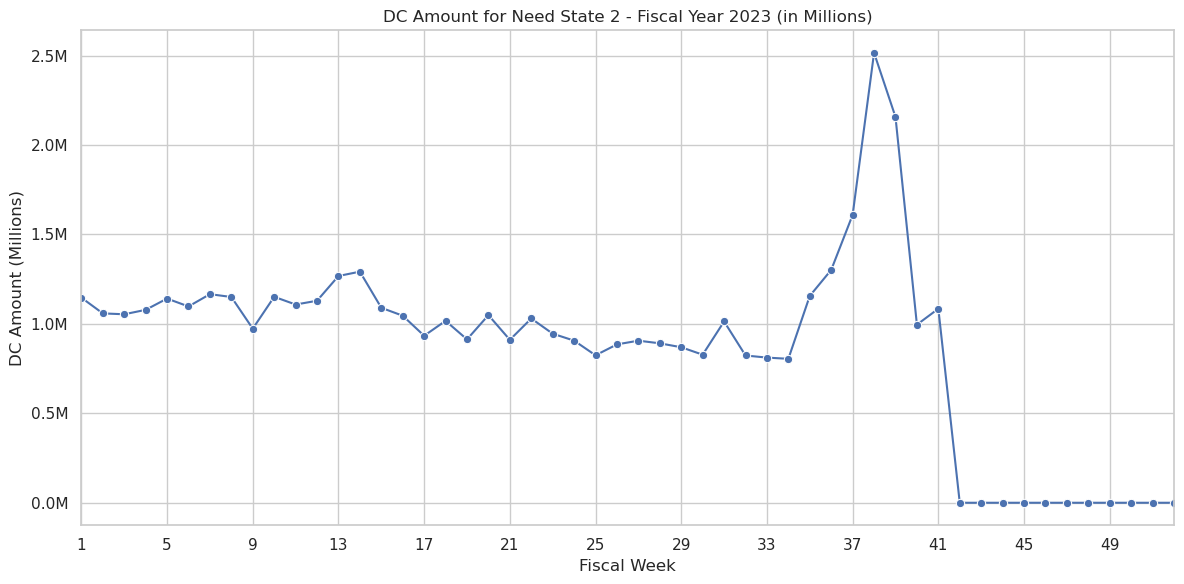

In [48]:
# Filter for 'Need State 2'
need_state_2_df = filtered_df[filtered_df['Need State'] == 'Need State 2']
# Group data by 'Fiscal Year' and 'Fiscal Week', then aggregate total sales
grouped_sales = need_state_2_df.groupby(['Fiscal Year', 'Fiscal Week'])['DC Amount'].sum().reset_index()

# Function to format the y-axis labels as millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Set plot style
sns.set(style="whitegrid")

# Get unique fiscal years from the data
fiscal_years = grouped_sales['Fiscal Year'].unique()

for year in fiscal_years:
    # Ensure the x-axis covers all weeks from 1 to 52
    all_weeks = pd.DataFrame({'Fiscal Week': range(1, 53)})
    # Merge to ensure all weeks are represented, even if there's no data for some
    year_data = pd.merge(all_weeks, grouped_sales[grouped_sales['Fiscal Year'] == year], on='Fiscal Week', how='left').fillna(0)
    
    # Create a line plot for the fiscal year
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(x='Fiscal Week', y='DC Amount', data=year_data, marker='o', sort=False)
    ax.yaxis.set_major_formatter(formatter)  # Apply the formatter to the y-axis
    plt.title(f'DC Amount for Need State 2 - Fiscal Year {year} (in Millions)')
    plt.xlabel('Fiscal Week')
    plt.ylabel('DC Amount (Millions)')
    
    # Set x-ticks to display every 4 weeks
    plt.xticks(np.arange(1, 53, 4))
    plt.xlim(1, 52)  # Ensure x-axis goes from week 1 to 52
    
    plt.tight_layout()
    plt.show()

### Need State 3 Exploration

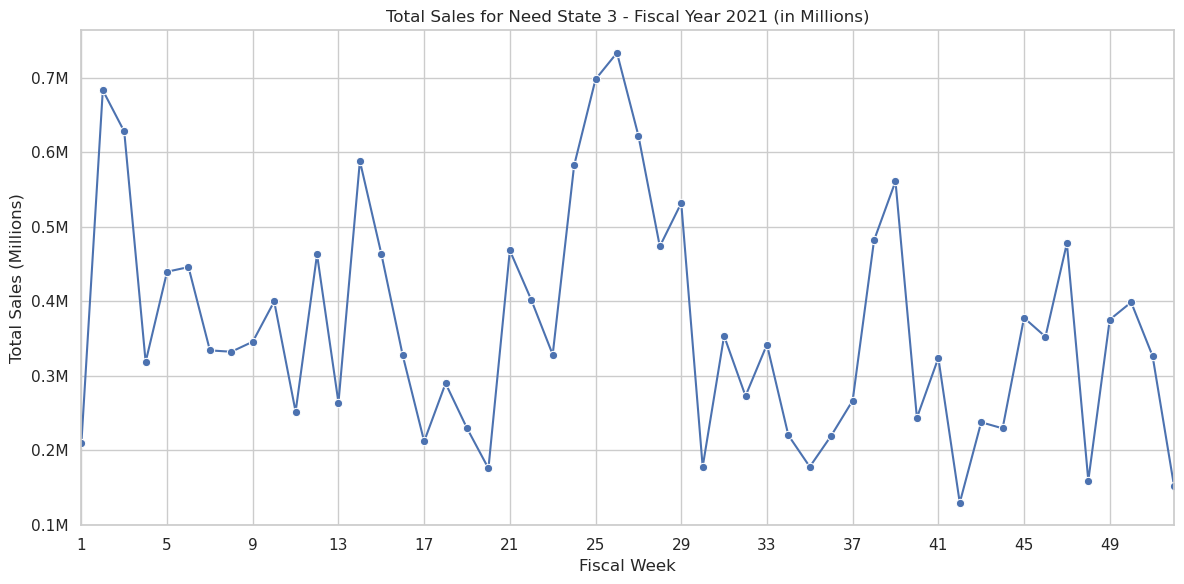

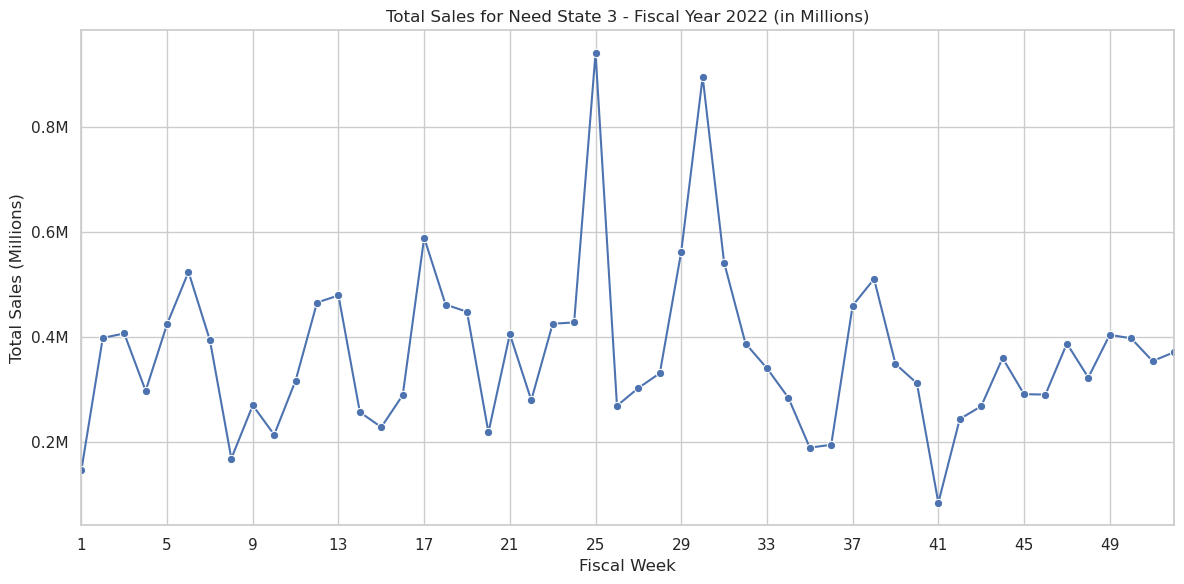

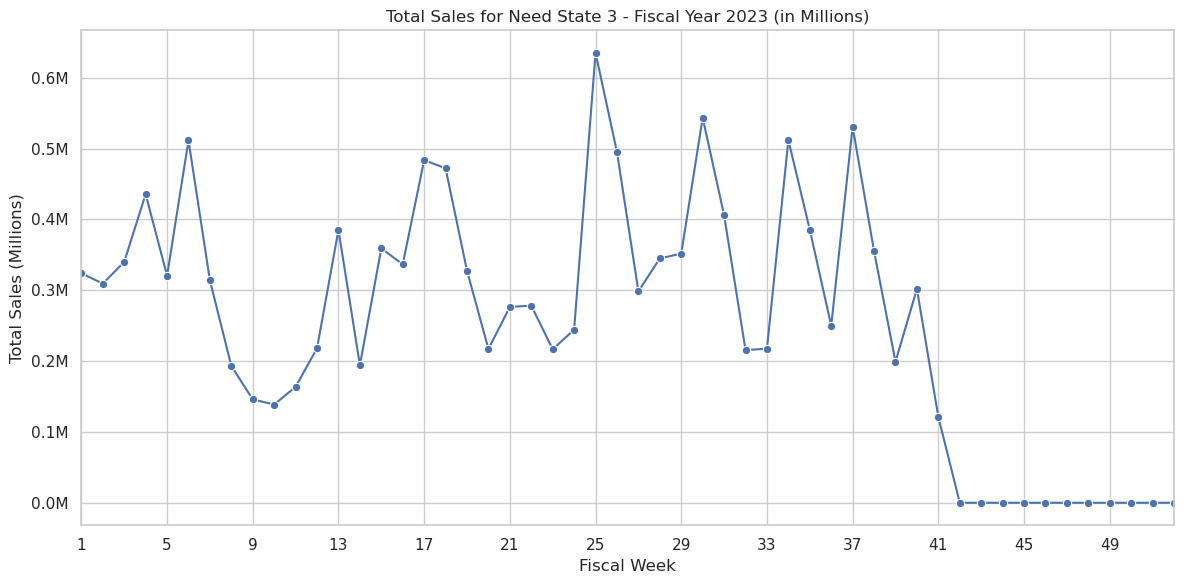

In [47]:
# Filter for 'Need State 3'
need_state_3_df = filtered_df[filtered_df['Need State'] == 'Need State 3']
# Group data by 'Fiscal Year' and 'Fiscal Week', then aggregate total sales
grouped_sales_3 = need_state_3_df.groupby(['Fiscal Year', 'Fiscal Week'])['Total Sales'].sum().reset_index()

# Function to format the y-axis labels as millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Set plot style
sns.set(style="whitegrid")

# Get unique fiscal years from the data
fiscal_years = grouped_sales_3['Fiscal Year'].unique()

for year in fiscal_years:
    # Ensure the x-axis covers all weeks from 1 to 52
    all_weeks = pd.DataFrame({'Fiscal Week': range(1, 53)})
    # Merge to ensure all weeks are represented, even if there's no data for some
    year_data = pd.merge(all_weeks, grouped_sales_3[grouped_sales_3['Fiscal Year'] == year], on='Fiscal Week', how='left').fillna(0)
    
    # Create a line plot for the fiscal year
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(x='Fiscal Week', y='Total Sales', data=year_data, marker='o', sort=False)
    ax.yaxis.set_major_formatter(formatter)  # Apply the formatter to the y-axis
    plt.title(f'Total Sales for Need State 3 - Fiscal Year {year} (in Millions)')
    plt.xlabel('Fiscal Week')
    plt.ylabel('Total Sales (Millions)')
    
    # Set x-ticks to display every 4 weeks
    plt.xticks(np.arange(1, 53, 4))
    plt.xlim(1, 52)  # Ensure x-axis goes from week 1 to 52
    
    plt.tight_layout()
    plt.show()

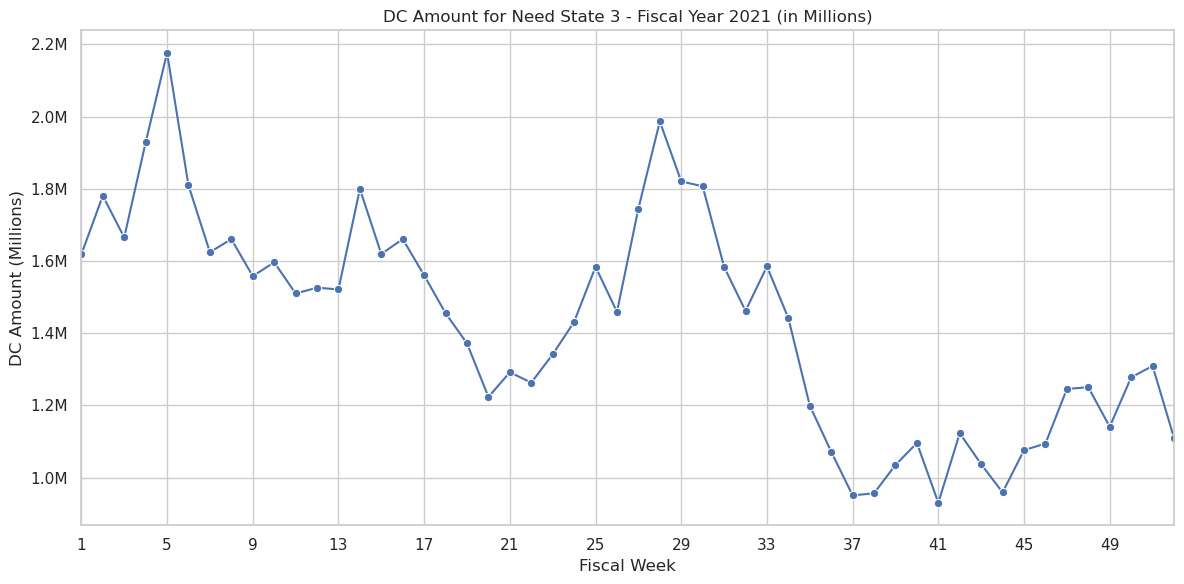

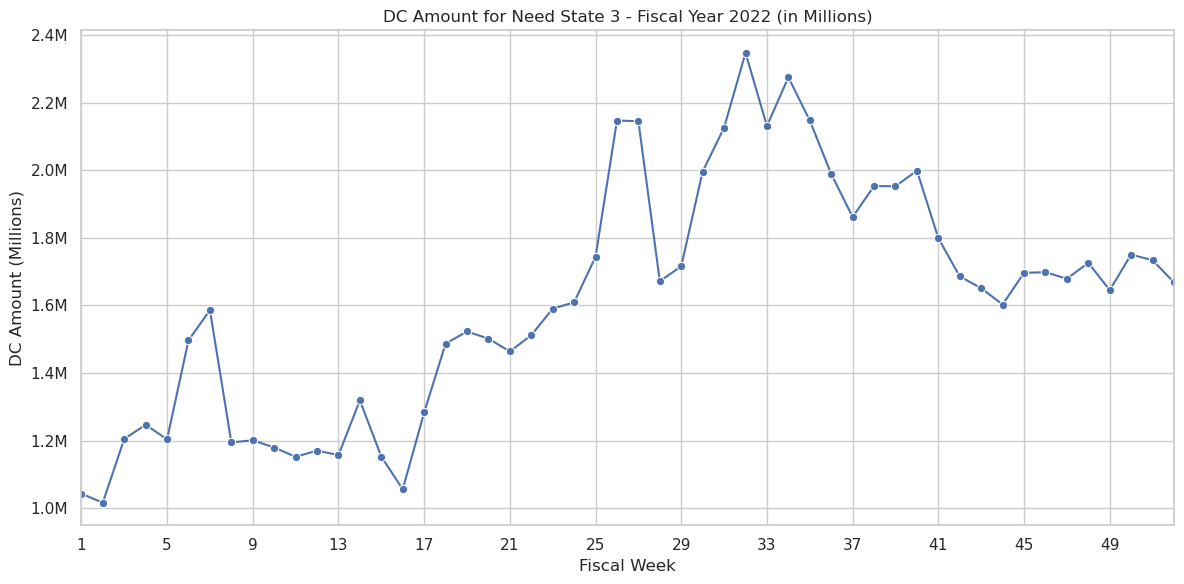

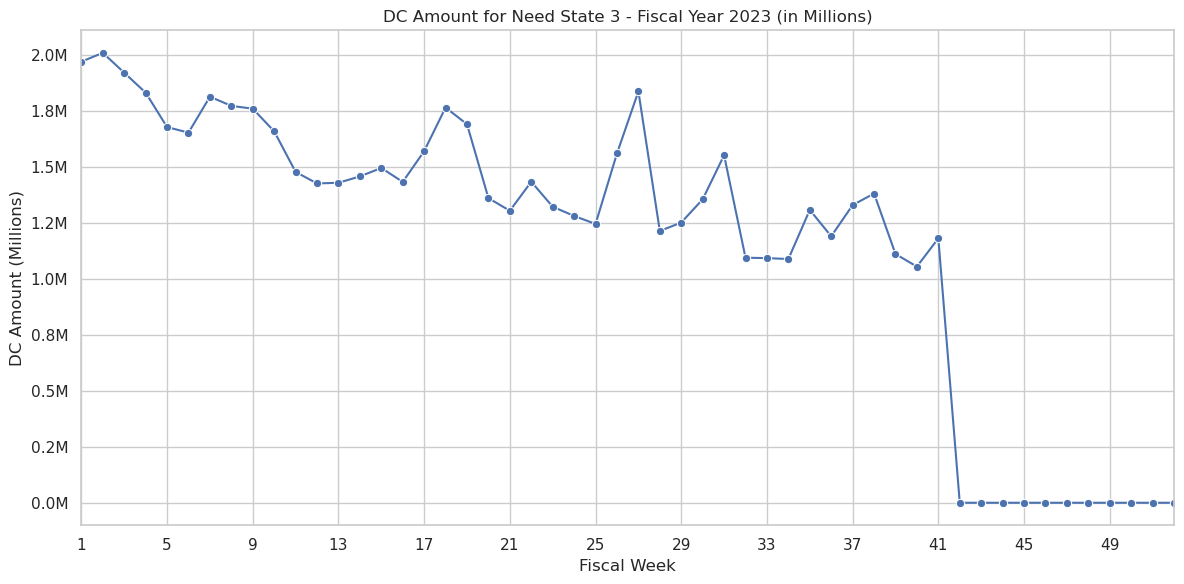

In [60]:
# Filter for 'Need State 3'
need_state_3_df = filtered_df[filtered_df['Need State'] == 'Need State 3']
# Group data by 'Fiscal Year' and 'Fiscal Week', then aggregate total sales
grouped_sales = need_state_3_df.groupby(['Fiscal Year', 'Fiscal Week'])['DC Amount'].sum().reset_index()

# Function to format the y-axis labels as millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Set plot style
sns.set(style="whitegrid")

# Get unique fiscal years from the data
fiscal_years = grouped_sales['Fiscal Year'].unique()

for year in fiscal_years:
    # Ensure the x-axis covers all weeks from 1 to 52
    all_weeks = pd.DataFrame({'Fiscal Week': range(1, 53)})
    # Merge to ensure all weeks are represented, even if there's no data for some
    year_data = pd.merge(all_weeks, grouped_sales[grouped_sales['Fiscal Year'] == year], on='Fiscal Week', how='left').fillna(0)
    
    # Create a line plot for the fiscal year
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(x='Fiscal Week', y='DC Amount', data=year_data, marker='o', sort=False)
    ax.yaxis.set_major_formatter(formatter)  # Apply the formatter to the y-axis
    plt.title(f'DC Amount for Need State 3 - Fiscal Year {year} (in Millions)')
    plt.xlabel('Fiscal Week')
    plt.ylabel('DC Amount (Millions)')
    
    # Set x-ticks to display every 4 weeks
    plt.xticks(np.arange(1, 53, 4))
    plt.xlim(1, 52)  # Ensure x-axis goes from week 1 to 52
    
    plt.tight_layout()
    plt.show()

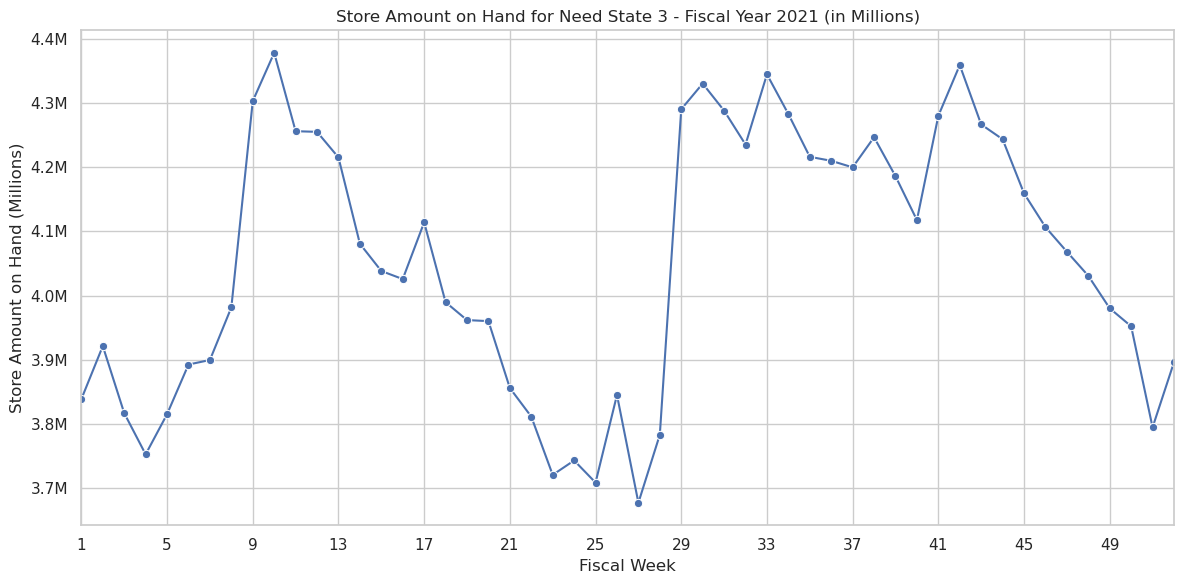

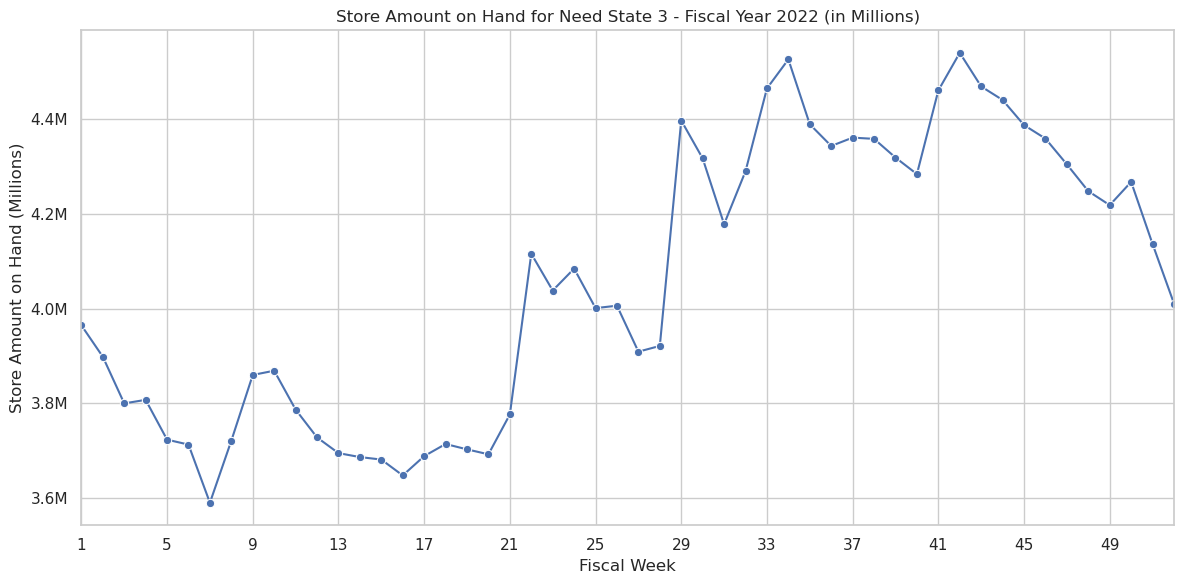

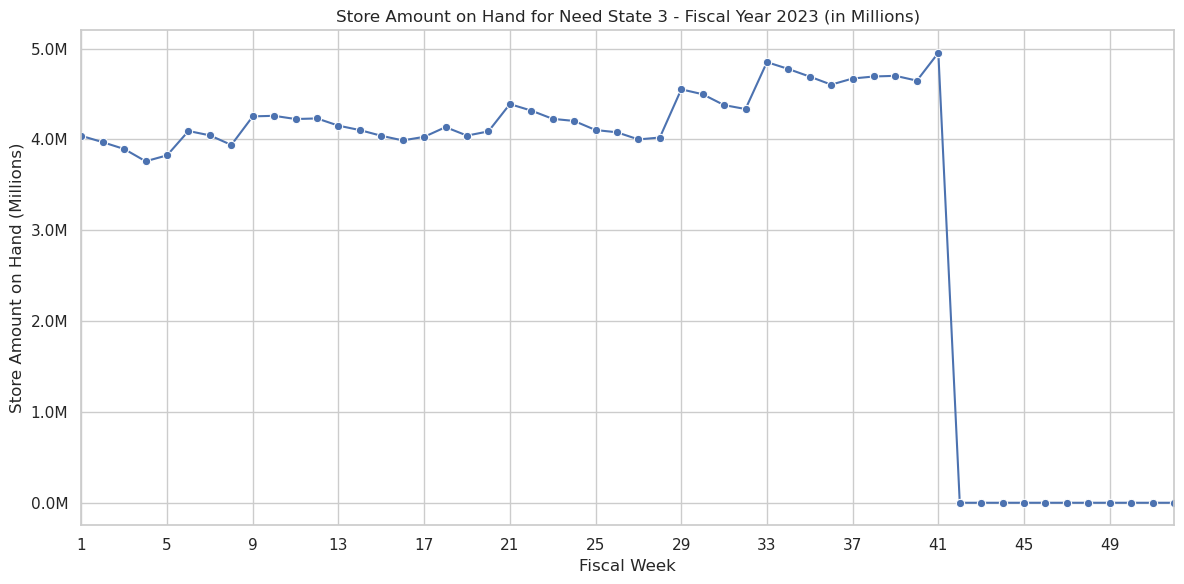

In [61]:
# Filter for 'Need State 3'
need_state_3_df = filtered_df[filtered_df['Need State'] == 'Need State 3']
# Group data by 'Fiscal Year' and 'Fiscal Week', then aggregate total sales
grouped_sales = need_state_3_df.groupby(['Fiscal Year', 'Fiscal Week'])['Store Amount on Hand'].sum().reset_index()

# Function to format the y-axis labels as millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Set plot style
sns.set(style="whitegrid")

# Get unique fiscal years from the data
fiscal_years = grouped_sales['Fiscal Year'].unique()

for year in fiscal_years:
    # Ensure the x-axis covers all weeks from 1 to 52
    all_weeks = pd.DataFrame({'Fiscal Week': range(1, 53)})
    # Merge to ensure all weeks are represented, even if there's no data for some
    year_data = pd.merge(all_weeks, grouped_sales[grouped_sales['Fiscal Year'] == year], on='Fiscal Week', how='left').fillna(0)
    
    # Create a line plot for the fiscal year
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(x='Fiscal Week', y='Store Amount on Hand', data=year_data, marker='o', sort=False)
    ax.yaxis.set_major_formatter(formatter)  # Apply the formatter to the y-axis
    plt.title(f'Store Amount on Hand for Need State 3 - Fiscal Year {year} (in Millions)')
    plt.xlabel('Fiscal Week')
    plt.ylabel('Store Amount on Hand (Millions)')
    
    # Set x-ticks to display every 4 weeks
    plt.xticks(np.arange(1, 53, 4))
    plt.xlim(1, 52)  # Ensure x-axis goes from week 1 to 52
    
    plt.tight_layout()
    plt.show()

### Need State 4 Exploration

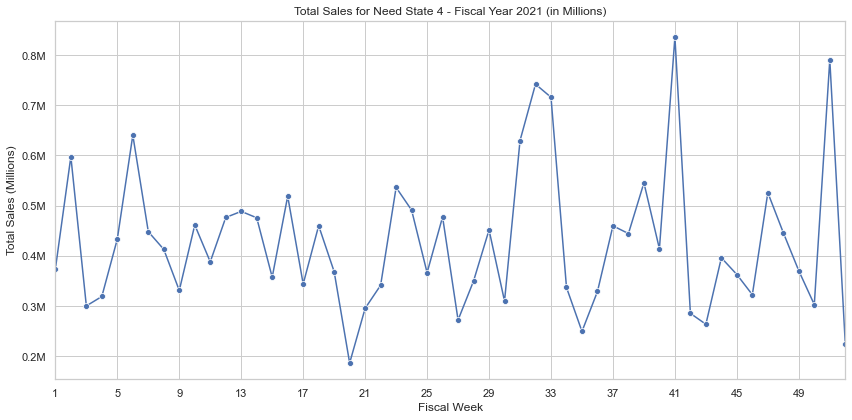

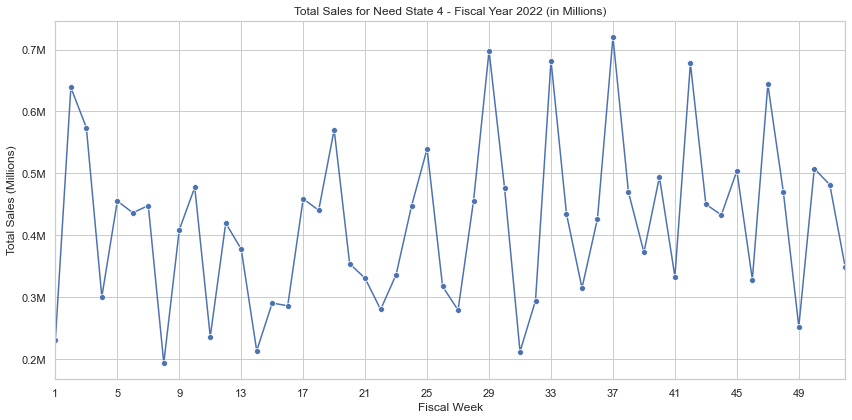

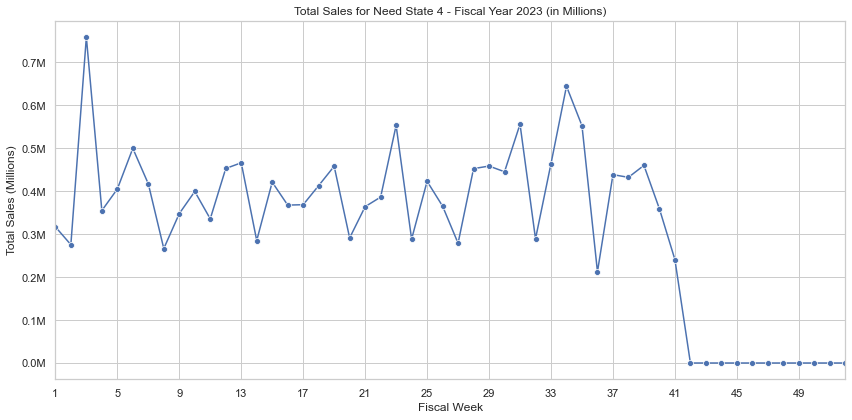

In [74]:
# Filter for 'Need State 4'
need_state_4_df = filtered_df[filtered_df['Need State'] == 'Need State 4']
# Group data by 'Fiscal Year' and 'Fiscal Week', then aggregate total sales
grouped_sales_4 = need_state_4_df.groupby(['Fiscal Year', 'Fiscal Week'])['Total Sales'].sum().reset_index()

# Function to format the y-axis labels as millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Set plot style
sns.set(style="whitegrid")

# Get unique fiscal years from the data
fiscal_years = grouped_sales_4['Fiscal Year'].unique()

for year in fiscal_years:
    # Ensure the x-axis covers all weeks from 1 to 52
    all_weeks = pd.DataFrame({'Fiscal Week': range(1, 53)})
    # Merge to ensure all weeks are represented, even if there's no data for some
    year_data = pd.merge(all_weeks, grouped_sales_4[grouped_sales_4['Fiscal Year'] == year], on='Fiscal Week', how='left').fillna(0)
    
    # Create a line plot for the fiscal year
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(x='Fiscal Week', y='Total Sales', data=year_data, marker='o', sort=False)
    ax.yaxis.set_major_formatter(formatter)  # Apply the formatter to the y-axis
    plt.title(f'Total Sales for Need State 4 - Fiscal Year {year} (in Millions)')
    plt.xlabel('Fiscal Week')
    plt.ylabel('Total Sales (Millions)')
    
    # Set x-ticks to display every 4 weeks
    plt.xticks(np.arange(1, 53, 4))
    plt.xlim(1, 52)  # Ensure x-axis goes from week 1 to 52
    
    plt.tight_layout()
    plt.show()

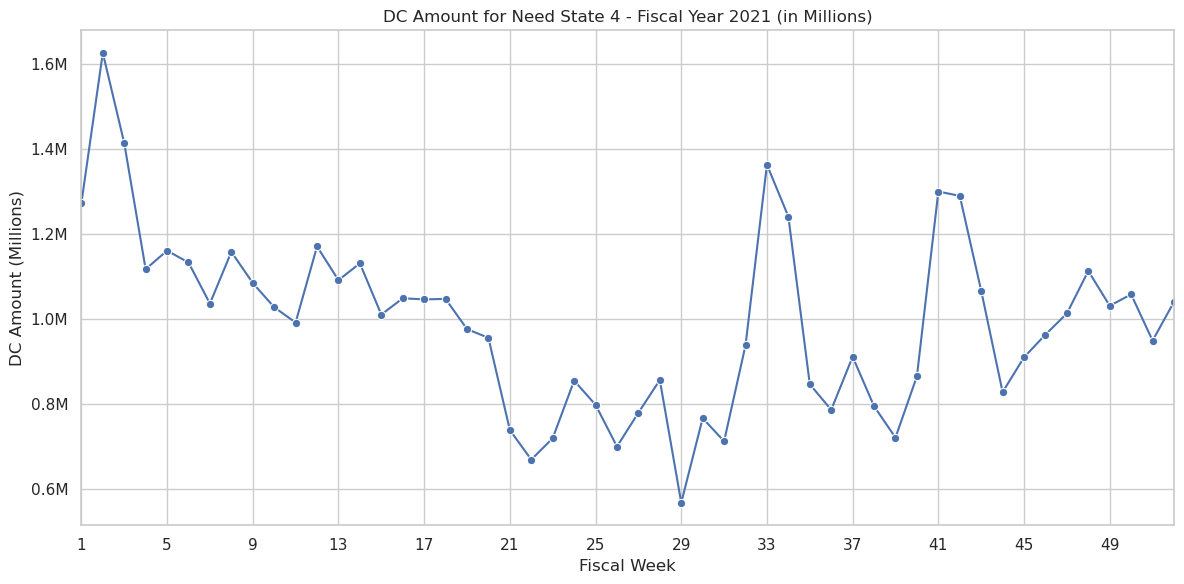

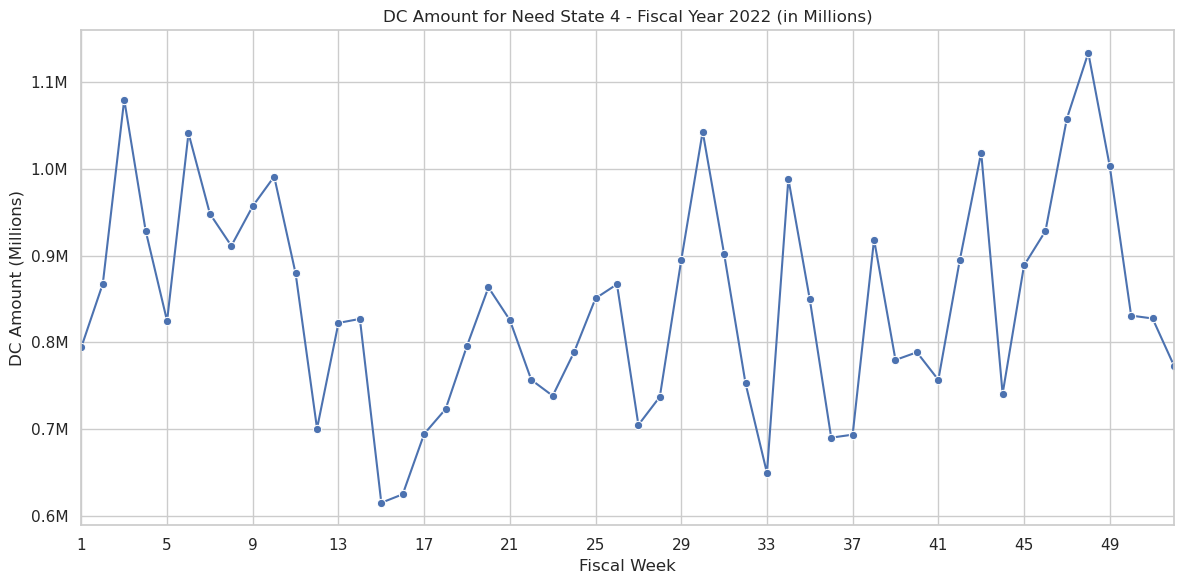

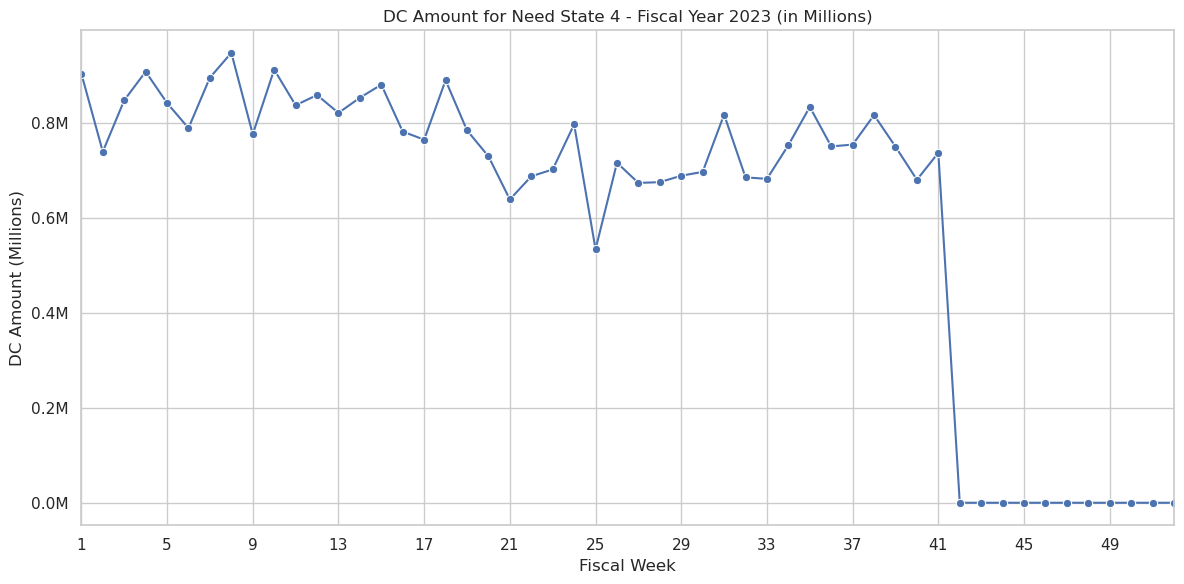

In [50]:
# Filter for 'Need State 4'
need_state_4_df = filtered_df[filtered_df['Need State'] == 'Need State 4']
# Group data by 'Fiscal Year' and 'Fiscal Week', then aggregate total sales
grouped_sales = need_state_4_df.groupby(['Fiscal Year', 'Fiscal Week'])['DC Amount'].sum().reset_index()

# Function to format the y-axis labels as millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Set plot style
sns.set(style="whitegrid")

# Get unique fiscal years from the data
fiscal_years = grouped_sales['Fiscal Year'].unique()

for year in fiscal_years:
    # Ensure the x-axis covers all weeks from 1 to 52
    all_weeks = pd.DataFrame({'Fiscal Week': range(1, 53)})
    # Merge to ensure all weeks are represented, even if there's no data for some
    year_data = pd.merge(all_weeks, grouped_sales[grouped_sales['Fiscal Year'] == year], on='Fiscal Week', how='left').fillna(0)
    
    # Create a line plot for the fiscal year
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(x='Fiscal Week', y='DC Amount', data=year_data, marker='o', sort=False)
    ax.yaxis.set_major_formatter(formatter)  # Apply the formatter to the y-axis
    plt.title(f'DC Amount for Need State 4 - Fiscal Year {year} (in Millions)')
    plt.xlabel('Fiscal Week')
    plt.ylabel('DC Amount (Millions)')
    
    # Set x-ticks to display every 4 weeks
    plt.xticks(np.arange(1, 53, 4))
    plt.xlim(1, 52)  # Ensure x-axis goes from week 1 to 52
    
    plt.tight_layout()
    plt.show()

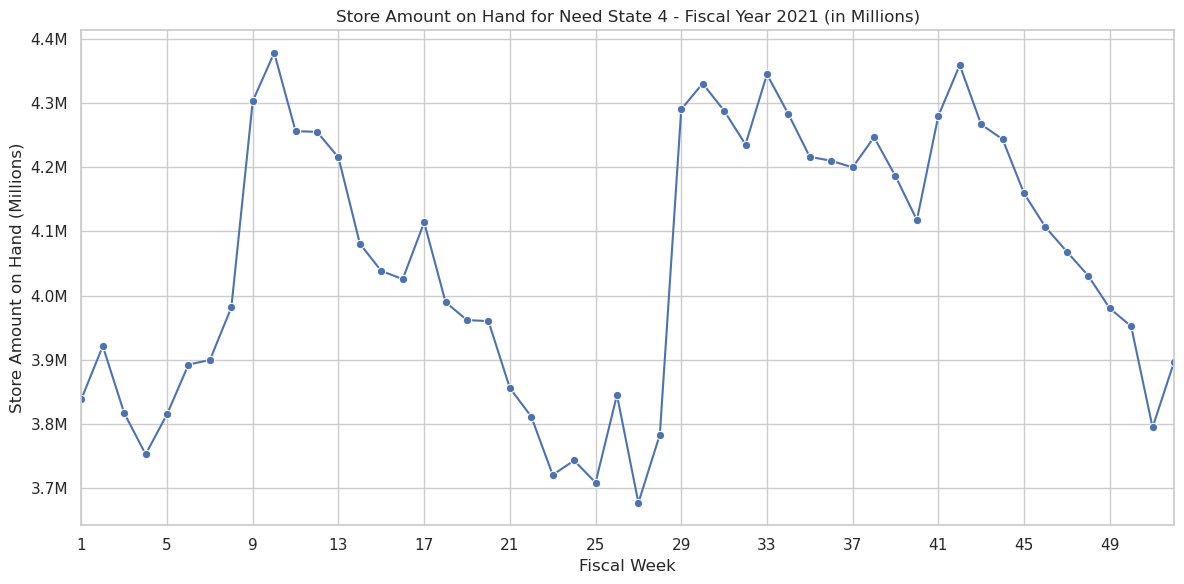

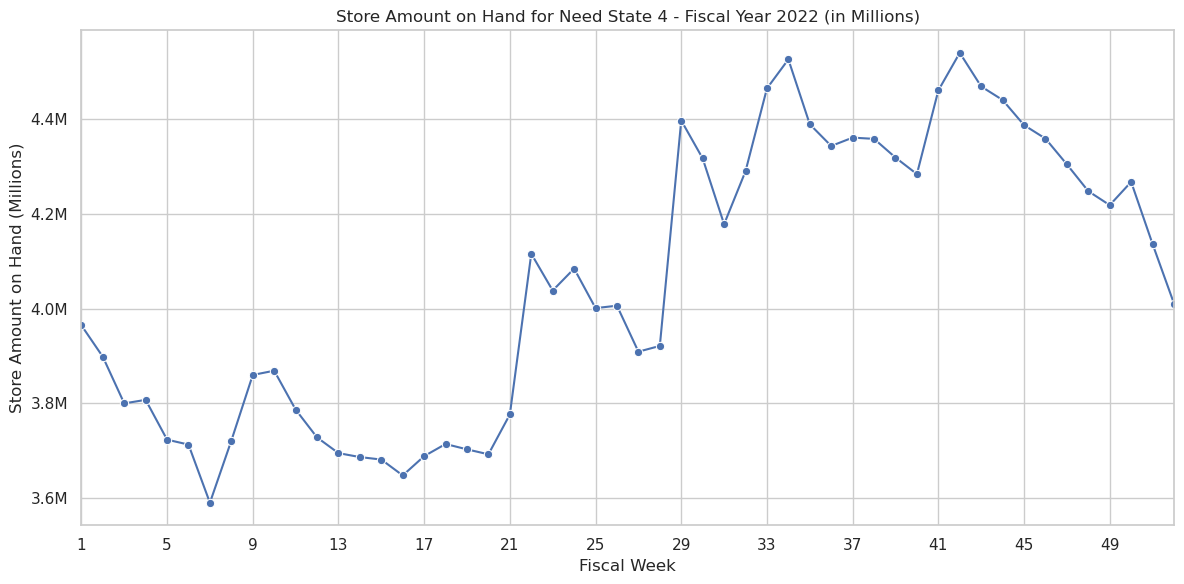

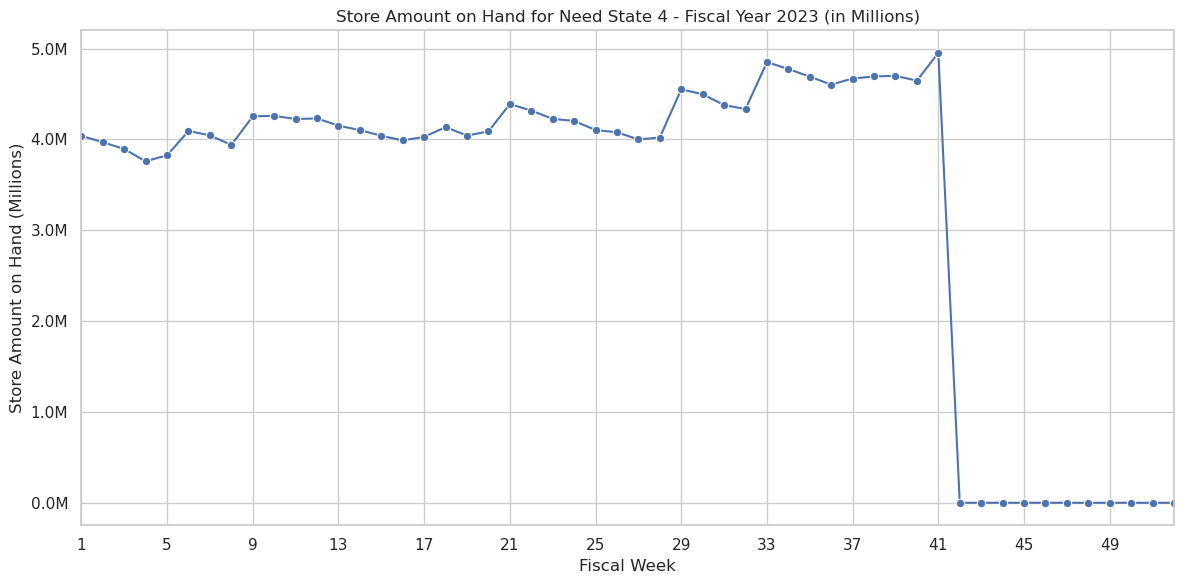

In [62]:
# Filter for 'Need State 4'
need_state_4_df = filtered_df[filtered_df['Need State'] == 'Need State 3']
# Group data by 'Fiscal Year' and 'Fiscal Week', then aggregate total sales
grouped_sales = need_state_4_df.groupby(['Fiscal Year', 'Fiscal Week'])['Store Amount on Hand'].sum().reset_index()

# Function to format the y-axis labels as millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Set plot style
sns.set(style="whitegrid")

# Get unique fiscal years from the data
fiscal_years = grouped_sales['Fiscal Year'].unique()

for year in fiscal_years:
    # Ensure the x-axis covers all weeks from 1 to 52
    all_weeks = pd.DataFrame({'Fiscal Week': range(1, 53)})
    # Merge to ensure all weeks are represented, even if there's no data for some
    year_data = pd.merge(all_weeks, grouped_sales[grouped_sales['Fiscal Year'] == year], on='Fiscal Week', how='left').fillna(0)
    
    # Create a line plot for the fiscal year
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(x='Fiscal Week', y='Store Amount on Hand', data=year_data, marker='o', sort=False)
    ax.yaxis.set_major_formatter(formatter)  # Apply the formatter to the y-axis
    plt.title(f'Store Amount on Hand for Need State 4 - Fiscal Year {year} (in Millions)')
    plt.xlabel('Fiscal Week')
    plt.ylabel('Store Amount on Hand (Millions)')
    
    # Set x-ticks to display every 4 weeks
    plt.xticks(np.arange(1, 53, 4))
    plt.xlim(1, 52)  # Ensure x-axis goes from week 1 to 52
    
    plt.tight_layout()
    plt.show()

### Need State 5 Exploration

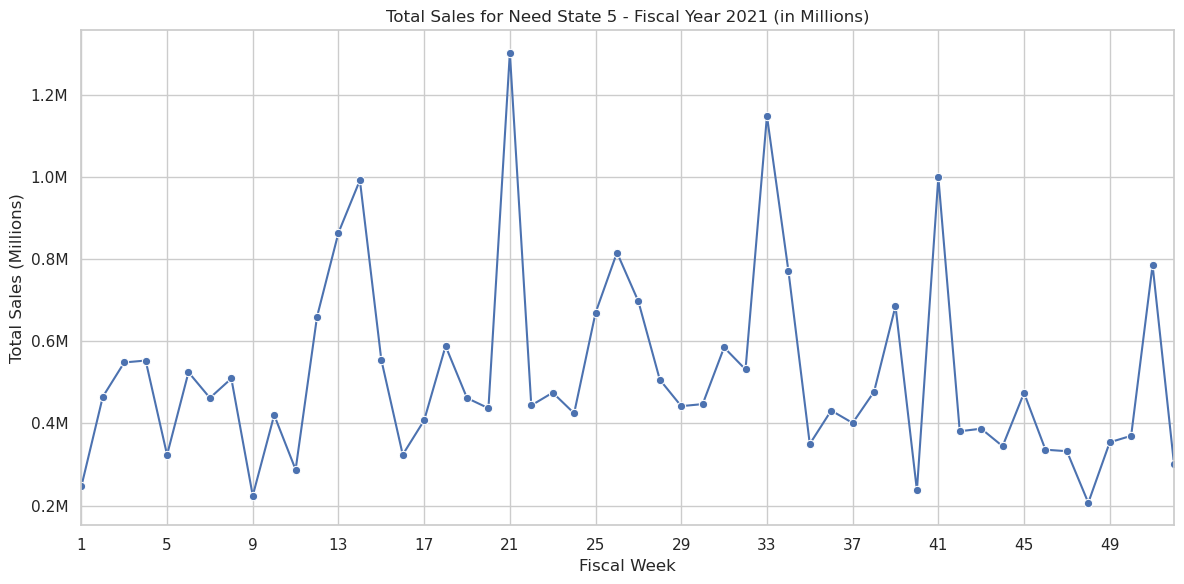

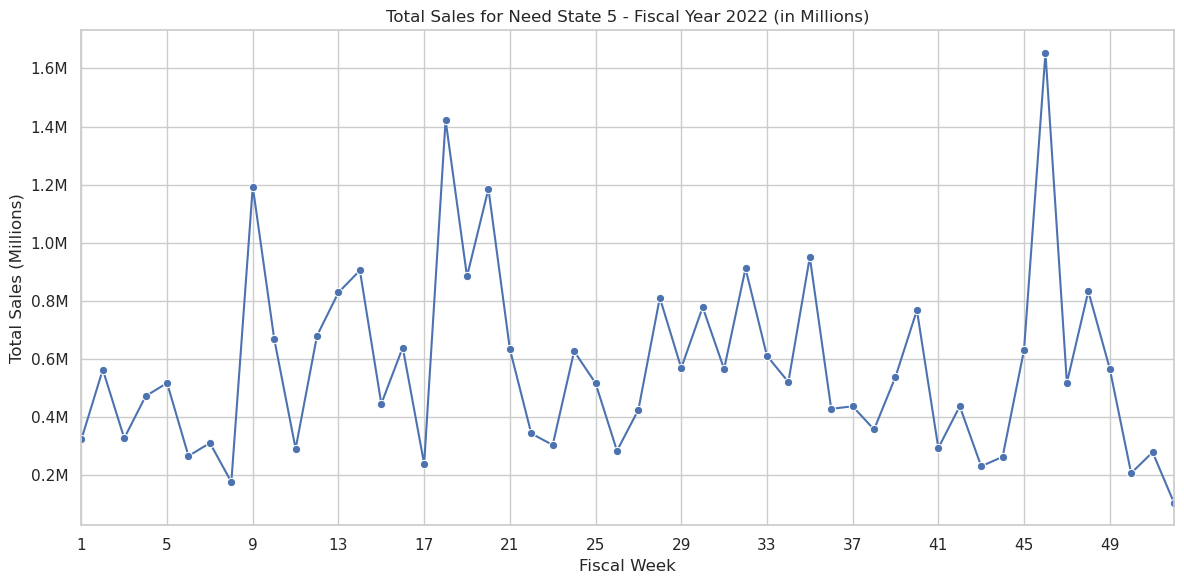

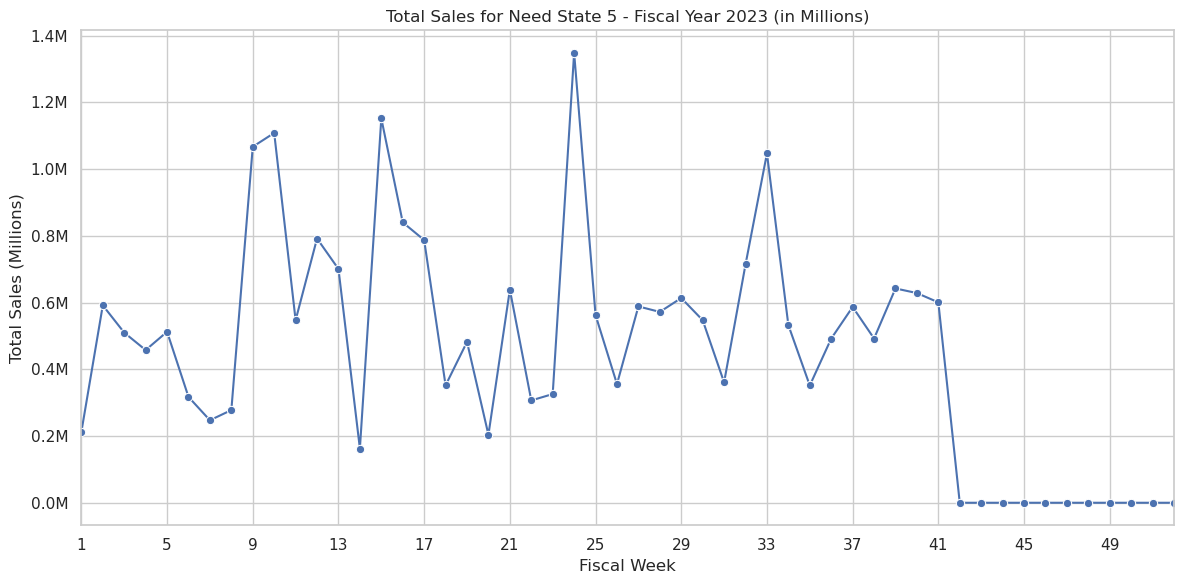

In [51]:
# Filter for 'Need State 5'
need_state_5_df = filtered_df[filtered_df['Need State'] == 'Need State 5']
# Group data by 'Fiscal Year' and 'Fiscal Week', then aggregate total sales
grouped_sales_5 = need_state_5_df.groupby(['Fiscal Year', 'Fiscal Week'])['Total Sales'].sum().reset_index()

# Function to format the y-axis labels as millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Set plot style
sns.set(style="whitegrid")

# Get unique fiscal years from the data
fiscal_years = grouped_sales_5['Fiscal Year'].unique()

for year in fiscal_years:
    # Ensure the x-axis covers all weeks from 1 to 52
    all_weeks = pd.DataFrame({'Fiscal Week': range(1, 53)})
    # Merge to ensure all weeks are represented, even if there's no data for some
    year_data = pd.merge(all_weeks, grouped_sales_5[grouped_sales_5['Fiscal Year'] == year], on='Fiscal Week', how='left').fillna(0)
    
    # Create a line plot for the fiscal year
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(x='Fiscal Week', y='Total Sales', data=year_data, marker='o', sort=False)
    ax.yaxis.set_major_formatter(formatter)  # Apply the formatter to the y-axis
    plt.title(f'Total Sales for Need State 5 - Fiscal Year {year} (in Millions)')
    plt.xlabel('Fiscal Week')
    plt.ylabel('Total Sales (Millions)')
    
    # Set x-ticks to display every 4 weeks
    plt.xticks(np.arange(1, 53, 4))
    plt.xlim(1, 52)  # Ensure x-axis goes from week 1 to 52
    
    plt.tight_layout()
    plt.show()

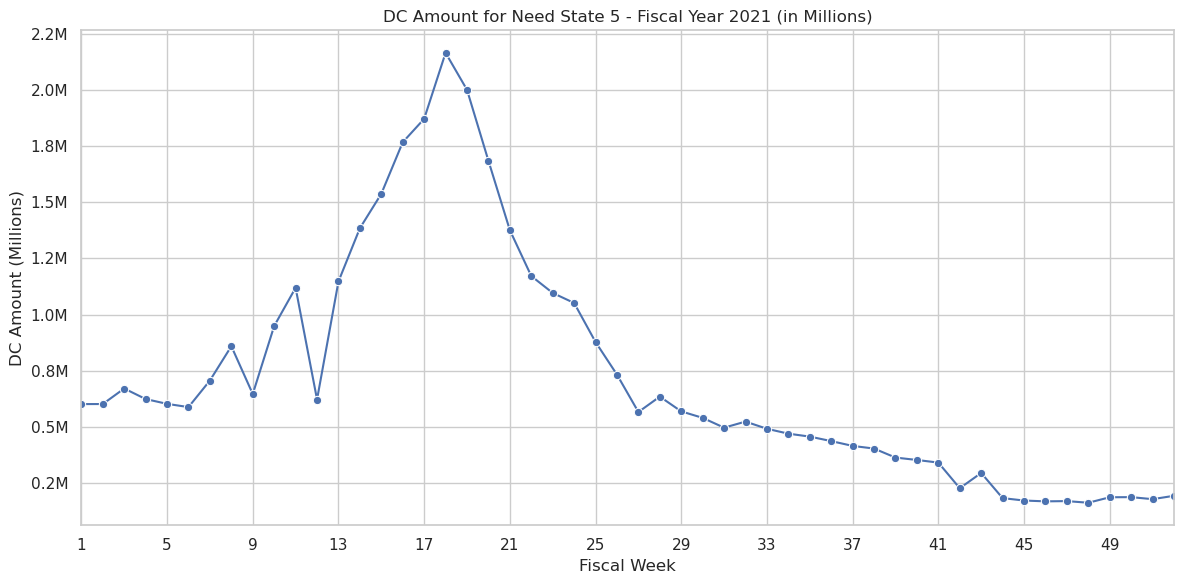

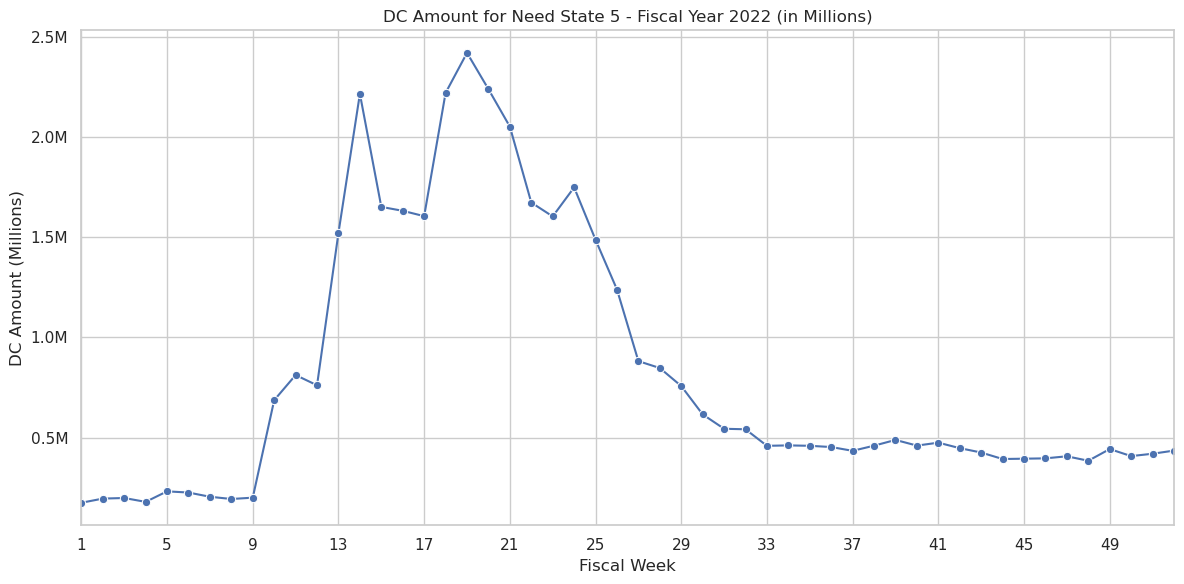

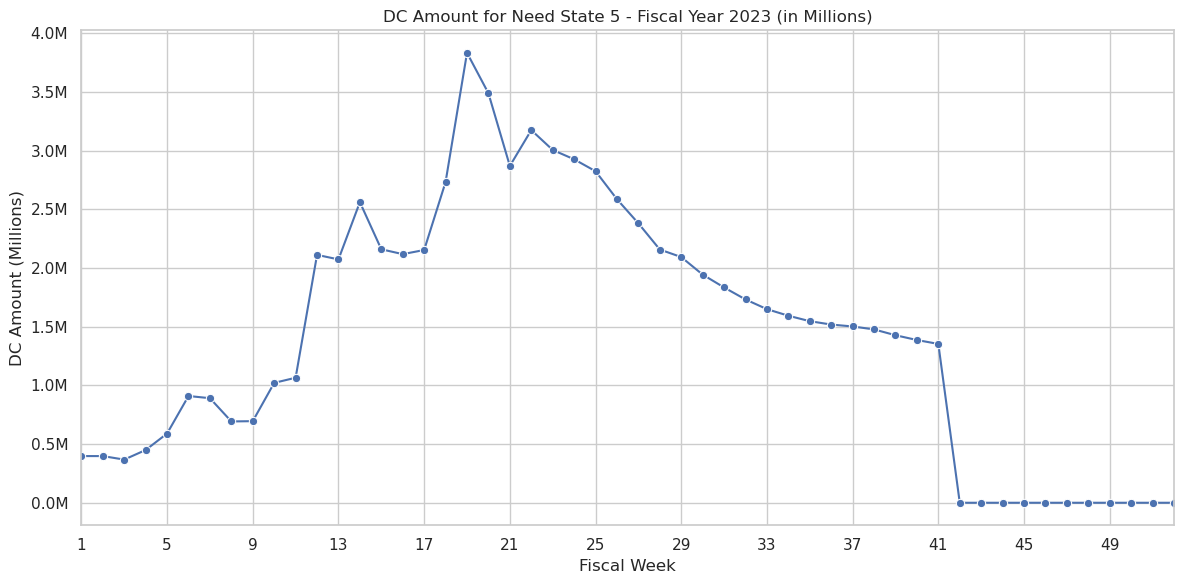

In [52]:
# Filter for 'Need State 5'
need_state_5_df = filtered_df[filtered_df['Need State'] == 'Need State 5']
# Group data by 'Fiscal Year' and 'Fiscal Week', then aggregate total sales
grouped_sales_5 = need_state_5_df.groupby(['Fiscal Year', 'Fiscal Week'])['DC Amount'].sum().reset_index()

# Function to format the y-axis labels as millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Set plot style
sns.set(style="whitegrid")

# Get unique fiscal years from the data
fiscal_years = grouped_sales_5['Fiscal Year'].unique()

for year in fiscal_years:
    # Ensure the x-axis covers all weeks from 1 to 52
    all_weeks = pd.DataFrame({'Fiscal Week': range(1, 53)})
    # Merge to ensure all weeks are represented, even if there's no data for some
    year_data = pd.merge(all_weeks, grouped_sales_5[grouped_sales_5['Fiscal Year'] == year], on='Fiscal Week', how='left').fillna(0)
    
    # Create a line plot for the fiscal year
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(x='Fiscal Week', y='DC Amount', data=year_data, marker='o', sort=False)
    ax.yaxis.set_major_formatter(formatter)  # Apply the formatter to the y-axis
    plt.title(f'DC Amount for Need State 5 - Fiscal Year {year} (in Millions)')
    plt.xlabel('Fiscal Week')
    plt.ylabel('DC Amount (Millions)')
    
    # Set x-ticks to display every 4 weeks
    plt.xticks(np.arange(1, 53, 4))
    plt.xlim(1, 52)  # Ensure x-axis goes from week 1 to 52
    
    plt.tight_layout()
    plt.show()

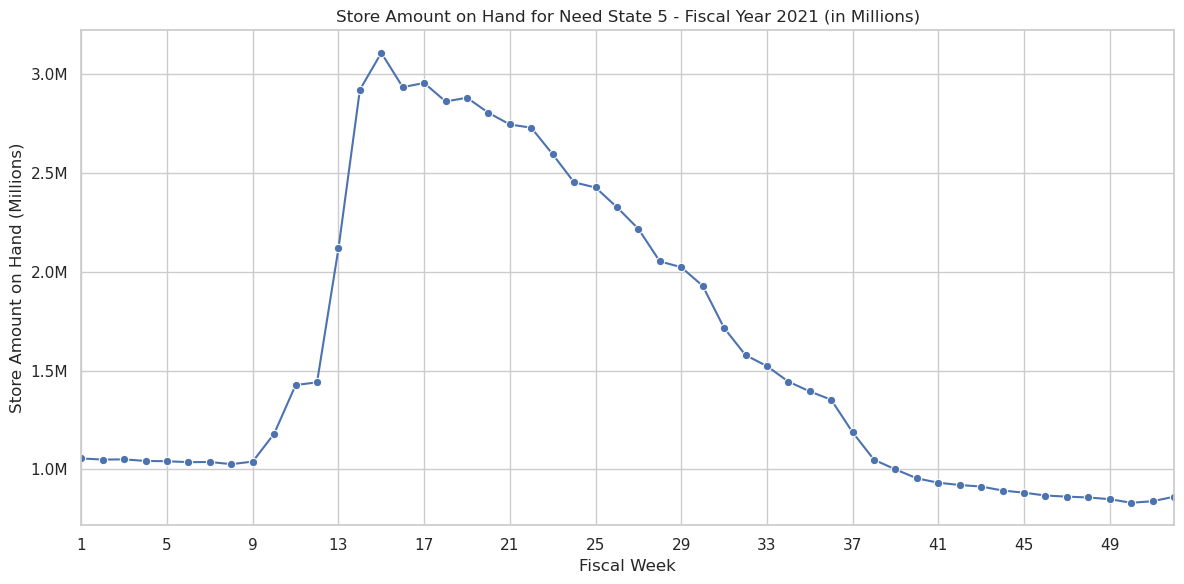

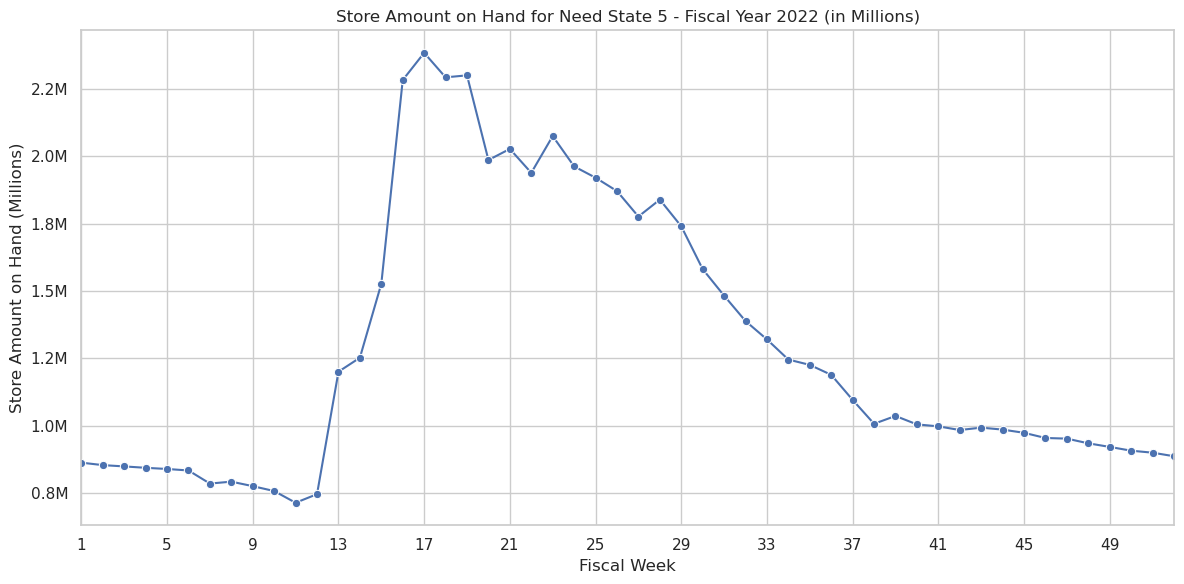

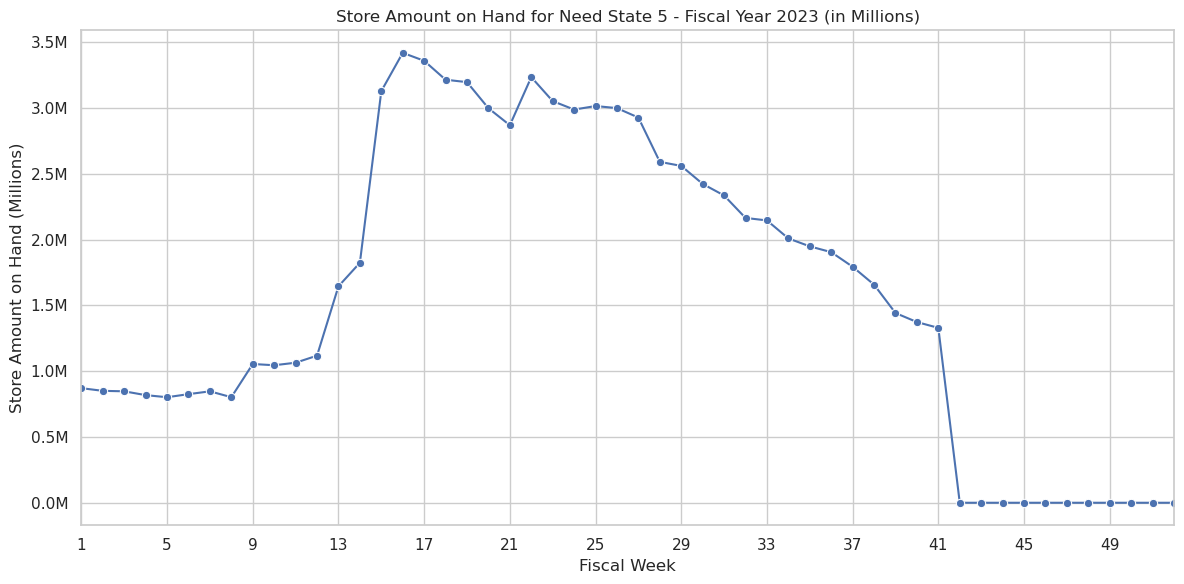

In [63]:
# Filter for 'Need State 5'
need_state_5_df = filtered_df[filtered_df['Need State'] == 'Need State 5']
# Group data by 'Fiscal Year' and 'Fiscal Week', then aggregate total sales
grouped_sales = need_state_5_df.groupby(['Fiscal Year', 'Fiscal Week'])['Store Amount on Hand'].sum().reset_index()

# Function to format the y-axis labels as millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Set plot style
sns.set(style="whitegrid")

# Get unique fiscal years from the data
fiscal_years = grouped_sales['Fiscal Year'].unique()

for year in fiscal_years:
    # Ensure the x-axis covers all weeks from 1 to 52
    all_weeks = pd.DataFrame({'Fiscal Week': range(1, 53)})
    # Merge to ensure all weeks are represented, even if there's no data for some
    year_data = pd.merge(all_weeks, grouped_sales[grouped_sales['Fiscal Year'] == year], on='Fiscal Week', how='left').fillna(0)
    
    # Create a line plot for the fiscal year
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(x='Fiscal Week', y='Store Amount on Hand', data=year_data, marker='o', sort=False)
    ax.yaxis.set_major_formatter(formatter)  # Apply the formatter to the y-axis
    plt.title(f'Store Amount on Hand for Need State 5 - Fiscal Year {year} (in Millions)')
    plt.xlabel('Fiscal Week')
    plt.ylabel('Store Amount on Hand (Millions)')
    
    # Set x-ticks to display every 4 weeks
    plt.xticks(np.arange(1, 53, 4))
    plt.xlim(1, 52)  # Ensure x-axis goes from week 1 to 52
    
    plt.tight_layout()
    plt.show()